### Importing the data for analysis:

In [11]:
import pandas as pd

df = pd.df = pd.read_csv("loan_payments.csv")

### Task 1 - Convert columns to correct format:

In [10]:
from transform_data import DataTransform

transformer = DataTransform(df)
transformer.timedelta_cols()
transformer.datetime_cols()
transformer.categorical_cols()
transformer.get_dataframe()

modified_df = transformer.get_dataframe()

print(modified_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   id                           54231 non-null  int64          
 1   member_id                    54231 non-null  int64          
 2   loan_amount                  54231 non-null  int64          
 3   funded_amount                51224 non-null  float64        
 4   funded_amount_inv            54231 non-null  float64        
 5   term                         49459 non-null  object         
 6   int_rate                     49062 non-null  float64        
 7   instalment                   54231 non-null  float64        
 8   grade                        54231 non-null  category       
 9   sub_grade                    54231 non-null  object         
 10  employment_length            52113 non-null  object         
 11  home_ownership              

c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:31: UserWarning: Could

### Task 2 - Describing the data as it stands once Dtype have been updated:

In [12]:
from transform_data import DataFrameInfo

describing = DataFrameInfo(modified_df)
describing.describe()
describing.statistical_values()
describing.distinct_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   id                           54231 non-null  int64          
 1   member_id                    54231 non-null  int64          
 2   loan_amount                  54231 non-null  int64          
 3   funded_amount                51224 non-null  float64        
 4   funded_amount_inv            54231 non-null  float64        
 5   term                         49459 non-null  object         
 6   int_rate                     49062 non-null  float64        
 7   instalment                   54231 non-null  float64        
 8   grade                        54231 non-null  category       
 9   sub_grade                    54231 non-null  object         
 10  employment_length            52113 non-null  object         
 11  home_ownership              

{'term': 2,
 'grade': 7,
 'sub_grade': 35,
 'employment_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'loan_status': 9,
 'payment_plan': 2,
 'purpose': 14,
 'application_type': 1}

In [13]:
describing.shape()
describing.null_counts()

 
Total number of rows: 54231
Total number of columns: 43


                             Null Count  Null Percentage
funded_amount                      3007         5.544799
term                               4772         8.799395
int_rate                           5169         9.531449
employment_length                  2118         3.905515
mths_since_last_delinq            31002        57.166565
mths_since_last_record            48050        88.602460
last_payment_date                    73         0.134609
next_payment_date                 32608        60.127971
last_credit_pull_date                 7         0.012908
collections_12_mths_ex_med           51         0.094042
mths_since_last_major_derog       46732        86.172116


### Task 3 - Remove / Impute missing values in the data 

- Reduction of data points from 54231 to 51986 
- Showing the difference in the stats once removed/imputed missing values from the data.

In [14]:
from transform_data import DataFrameTransform

transforming=DataFrameTransform(modified_df)

transforming.null_counts()
transforming.remove_high_null_columns()
transforming.impute_columns_with_median()
transforming.impute_columns_with_mode()
transforming.remove_rows_with_missing_data()
updated_df = transforming.get_updated_dataframe()

print(updated_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51986 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          51986 non-null  int64         
 1   member_id                   51986 non-null  int64         
 2   loan_amount                 51986 non-null  int64         
 3   funded_amount               51986 non-null  float64       
 4   funded_amount_inv           51986 non-null  float64       
 5   term                        51986 non-null  object        
 6   int_rate                    51986 non-null  float64       
 7   instalment                  51986 non-null  float64       
 8   grade                       51986 non-null  category      
 9   sub_grade                   51986 non-null  object        
 10  employment_length           51986 non-null  object        
 11  home_ownership              51986 non-null  category      


In [15]:
describing = DataFrameInfo(updated_df)
describe_new_df = describing.shape()
describe_new_df = describing.null_counts()
print(describe_new_df)



 
Total number of rows: 51986
Total number of columns: 39
No columns with null values found.
None


#### Visualiation of null values before and after transformation:

<Figure size 2000x1200 with 0 Axes>

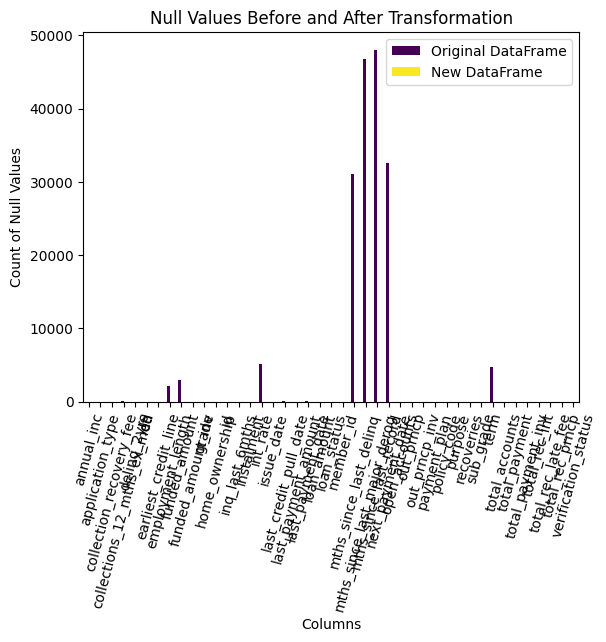

In [16]:
from transform_data import Plotter

plotting = Plotter()
plotting.plot_null_counts(df, updated_df)

#### Saving it down to csv to use in milestone4

In [17]:
updated_df.to_csv('C:/Users/torig/Project_2/Customer_loans_in_finance/updated_dataframe.csv', index=False)

### Task 4 - Perform transformation on skewed columns

Checking we have the right columns to check for the skewness of the data

In [18]:
from scipy.stats import skew

from transform_data import DataFrameInfo
numerical_columns = updated_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
excluded_columns = ['id', 'member_id', 'policy_code']
numerical_columns = [col for col in numerical_columns if col not in excluded_columns]
skew_cols = updated_df[numerical_columns].apply(lambda x: skew(x.dropna()))

print(f'Numerical columns for skewness analysis: {numerical_columns}')

Numerical columns for skewness analysis: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


Compute skewness for these columns:

In [19]:
from scipy.stats import skew
from transform_data import DataFrameTransform

fixing = DataFrameTransform(updated_df)
skewed_data = fixing.identify_skewed_columns(updated_df, numerical_columns)


Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']


Using the universal threshold to start (> 1) the drilling down into more details: 

In [20]:
universal_threshold = 1
flagged_columns = skew_cols [abs(skew_cols)>universal_threshold]
print(flagged_columns)

annual_inc                     8.790730
delinq_2yrs                    5.275585
inq_last_6mths                 3.279564
open_accounts                  1.058459
out_prncp                      2.354968
out_prncp_inv                  2.355409
total_payment                  1.258528
total_payment_inv              1.247212
total_rec_prncp                1.249398
total_rec_int                  2.193242
total_rec_late_fee            13.263072
recoveries                    13.895454
collection_recovery_fee       27.667418
last_payment_amount            2.475458
collections_12_mths_ex_med    20.423664
dtype: float64


 we will determine if the skewness is problematic based on data type, context of the variable and impact on analysis (for example heavily skewed predictor variables can distort regression)

- For discrete columns (delinq_2yrs & inq_last_6mnths) consider higher thresholds since skewness is expected

- For continious financial columns(loan_amount, recoveries) aim for skewness <1 after transformation.

With the info above: 

**Highly Skewed i.e. > 2: Needs transformation:**
- annual_inc
- out_prncp 
- out_prncp_inv
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_payment_amount

**Highly Skewed: Discrete Data so acceptable:**
- delinq_2yrs
- inq_last_6mths
- collections_12_mths_ex_med

**Moderately Skewed: (1.2-1.3):**
- total_payment
- total_payment_inv 
- total_rec_prncp

**Close to threshold: May benefit from transformation**
- open_accounts 


Putting this into code: 

In [21]:
fixing.identify_skewed_columns(updated_df, numerical_columns)

Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']


(['annual_inc',
  'delinq_2yrs',
  'inq_last_6mths',
  'out_prncp',
  'out_prncp_inv',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'last_payment_amount',
  'collections_12_mths_ex_med'],
 ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp'],
 ['loan_amount',
  'funded_amount',
  'funded_amount_inv',
  'int_rate',
  'instalment',
  'dti',
  'total_accounts'])

In [22]:
transformed_df = fixing.transform_data_based_on_skewness(updated_df, numerical_columns)

Highly skewed cols: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']
Moderatley skewed cols: ['open_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp']
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'total_accounts']
Applying log transformation to: annual_inc
Applying log transformation to: delinq_2yrs
Applying log transformation to: inq_last_6mths
Applying log transformation to: out_prncp
Applying log transformation to: out_prncp_inv
Applying log transformation to: total_rec_int
Applying log transformation to: total_rec_late_fee
Applying log transformation to: recoveries
Applying log transformation to: collection_recovery_fee
Applying log transformation to: last_payment_amount
Applying log transformation to: collections_12_mths_ex_med
Applying squ

Showing that after fixing with the above changes that all the moderately skewed cols are now acceptable. The remaining skewed columns: 

**Highly skewed cols:**
- delinq_2yrs [discrete data so acceptable to be higher]
- total_rec_late_fee, 
- recoveries, 
- collection_recovery_fee, 
- collections_12_mths_ex_med [discrete data so acceptable to be higher]


In [23]:
highly_skewed_columns, moderately_skewed_columns, acceptable_skewed_columns = fixing.identify_skewed_columns(transformed_df, numerical_columns)
print(highly_skewed_columns)


Highly skewed cols: ['delinq_2yrs', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
Moderatley skewed cols: []
Acceptable skewed cols: ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
['delinq_2yrs', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']


In [24]:
new_skew_values = transformed_df[numerical_columns].apply(lambda x: skew(x.dropna()))
print(new_skew_values)

loan_amount                    0.796729
funded_amount                  0.863188
funded_amount_inv              0.805889
int_rate                       0.461611
instalment                     0.988583
annual_inc                     0.196407
dti                            0.194336
delinq_2yrs                    2.548825
inq_last_6mths                 0.699937
open_accounts                  0.301144
total_accounts                 0.778388
out_prncp                      0.593736
out_prncp_inv                  0.593815
total_payment                  0.382031
total_payment_inv              0.298528
total_rec_prncp                0.379525
total_rec_int                 -0.553563
total_rec_late_fee             5.494509
recoveries                     3.815941
collection_recovery_fee        5.295740
last_payment_amount            0.183769
collections_12_mths_ex_med    17.105895
dtype: float64


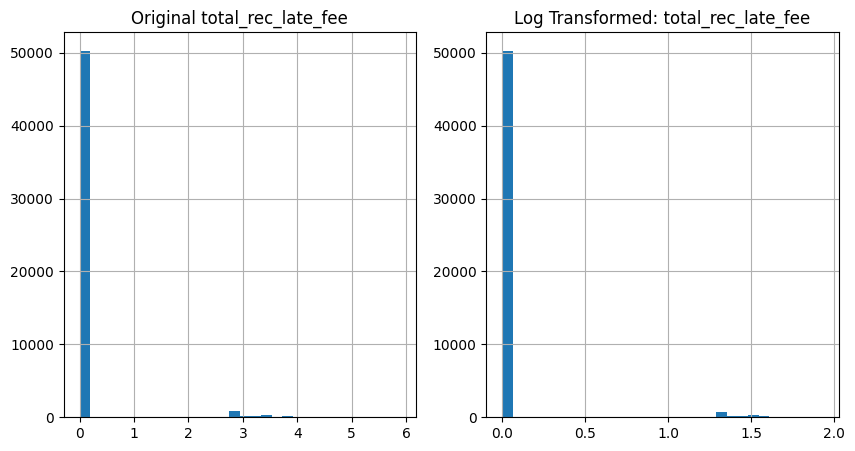

In [25]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"total_rec_late_fee")

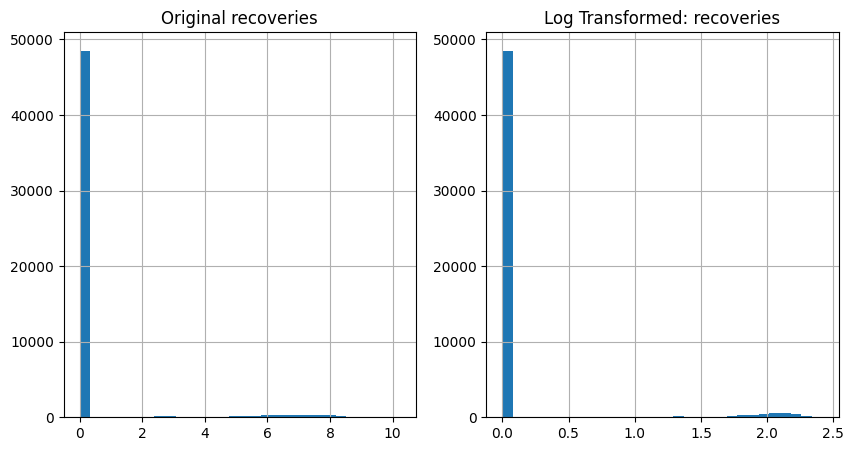

In [26]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"recoveries")

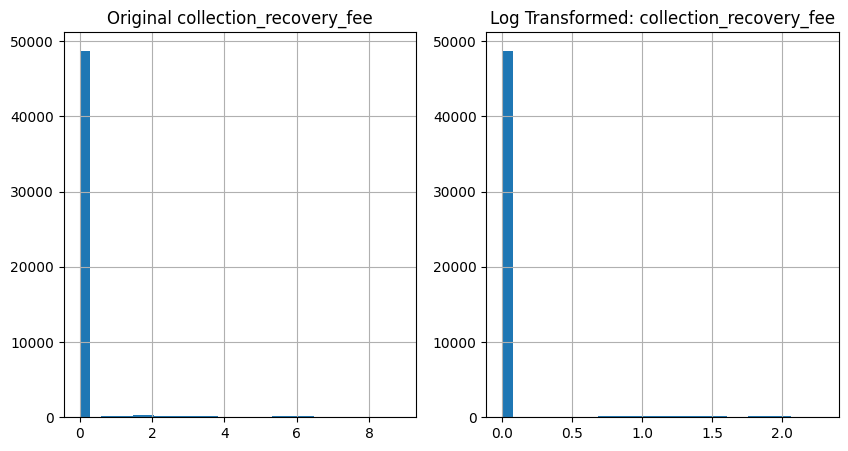

In [27]:
visualize = Plotter()
high_skewed_plot = visualize.visualising_column_distribution(updated_df, transformed_df,"collection_recovery_fee")

### Task 5 - Remove outliers from the data:

Start again from here down:



In [28]:
transformed_df.describe()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,issue_date,dti,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code
count,5.198600e+04,5.198600e+04,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986,51986.000000,...,51986.000000,51986.000000,51986.000000,51986.000000,51986.000000,51986,51986.000000,51986,51986.000000,51986.0
mean,7.547886e+06,8.572476e+06,13437.189820,13257.943966,13050.272384,13.482907,402.808056,11.054219,2018-09-11 12:30:49.790328320,15.828803,...,91.096468,7.411539,0.104623,0.419780,0.204193,2020-08-17 13:29:51.482322432,6.784666,2021-04-14 17:55:58.181048832,0.002786,1.0
min,5.552100e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,8.101981,2013-08-01 00:00:00,0.000000,...,0.000000,1.976855,0.000000,0.000000,0.000000,2013-12-01 00:00:00,0.000000,2013-08-01 00:00:00,0.000000,1.0
25%,7.512420e+05,9.491962e+05,7200.000000,7500.000000,6950.000000,10.650000,227.980000,10.714440,2017-05-01 00:00:00,10.190000,...,66.075449,6.805036,0.000000,0.000000,0.000000,2019-11-01 00:00:00,5.687365,2021-02-01 00:00:00,0.000000,1.0
50%,7.080184e+06,8.648362e+06,12000.000000,12000.000000,11500.000000,13.160000,349.650000,11.034970,2019-09-01 00:00:00,15.550000,...,88.319024,7.471013,0.000000,0.000000,0.000000,2021-03-01 00:00:00,6.351863,2022-01-01 00:00:00,0.000000,1.0
75%,8.846226e+06,1.044065e+07,18250.000000,18000.000000,18000.000000,15.880000,530.660000,11.379406,2019-11-01 00:00:00,21.200000,...,113.137085,8.119119,0.000000,0.000000,0.000000,2022-01-01 00:00:00,8.257449,2022-01-01 00:00:00,0.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,14.528355,2021-01-01 00:00:00,39.910000,...,187.082923,10.046004,5.885215,10.231027,8.854121,2022-01-01 00:00:00,10.494497,2022-01-01 00:00:00,1.609438,1.0
std,9.513012e+06,1.025409e+07,8097.087132,7813.437066,8115.767225,4.178076,239.338026,0.522774,NaN,7.597879,...,34.825915,1.029445,0.577033,1.627241,0.934233,NaN,1.658729,NaN,0.045623,0.0


In [29]:
columns_with_outliers = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

cleaned_df = fixing.remove_outliers(transformed_df, columns_with_outliers)


Lower bound: -9375.0, Upper bound: 34825.0
Lower bound: -7350.0, Upper bound: 31450.0
Lower bound: -9212.499717625002, Upper bound: 32687.499830575
Lower bound: 3.1850000000000023, Upper bound: 23.064999999999998
Lower bound: -207.0425, Upper bound: 929.5374999999999
Lower bound: 9.732539899366188, Upper bound: 12.3211453405549
Lower bound: -6.310000000000004, Upper bound: 37.690000000000005
Lower bound: -1.0397207708399179, Upper bound: 1.732867951399863
Lower bound: 1.206051364465493, Upper bound: 5.0452512220630865
Lower bound: -7.5, Upper bound: 52.5
Lower bound: -12.044755001740247, Upper bound: 20.074591669567077
Lower bound: -12.043509059125292, Upper bound: 20.072515098542155
Lower bound: 5.773703085202598, Upper bound: 195.04795409979587
Lower bound: 4.091677656254532, Upper bound: 193.71546620965822
Lower bound: 0.594383053179854, Upper bound: 174.91458856974526
Lower bound: 4.937470012467241, Upper bound: 9.827047976819927
Lower bound: 1.8399294853461723, Upper bound: 12.015

In [30]:
new_skew_values =  cleaned_df[numerical_columns].apply(lambda x: skew(x.dropna()))
#old_skew_values = transformed_df[numerical_columns].apply(lambda x: skew(x.dropna()))
#changes = new_skew_values - old_skew_values

print(new_skew_values)

cleaned_df.shape

loan_amount                    0.542945
funded_amount                  0.580007
funded_amount_inv              0.550237
int_rate                       0.193069
instalment                     0.585727
annual_inc                     0.057246
dti                            0.186135
delinq_2yrs                    2.580516
inq_last_6mths                 0.591537
open_accounts                  0.126540
total_accounts                 0.466004
out_prncp                      0.573820
out_prncp_inv                  0.573882
total_payment                  0.210427
total_payment_inv              0.160104
total_rec_prncp                0.223620
total_rec_int                 -0.233543
total_rec_late_fee             5.611390
recoveries                     3.962815
collection_recovery_fee        5.526968
last_payment_amount            0.333070
collections_12_mths_ex_med    18.376270
dtype: float64


(44139, 39)

In [31]:
data_loss_percent = (1 - (len(cleaned_df)/len(transformed_df))) * 100

print(f"Original DataFrame shape: {transformed_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
print(f"Percentage of data removed: {data_loss_percent:.2f}%")


Original DataFrame shape: (51986, 39)
Cleaned DataFrame shape: (44139, 39)
Percentage of data removed: 15.09%


c:\Users\torig\Project_2\Customer_loans_in_finance\transform_data.py:314: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 10))


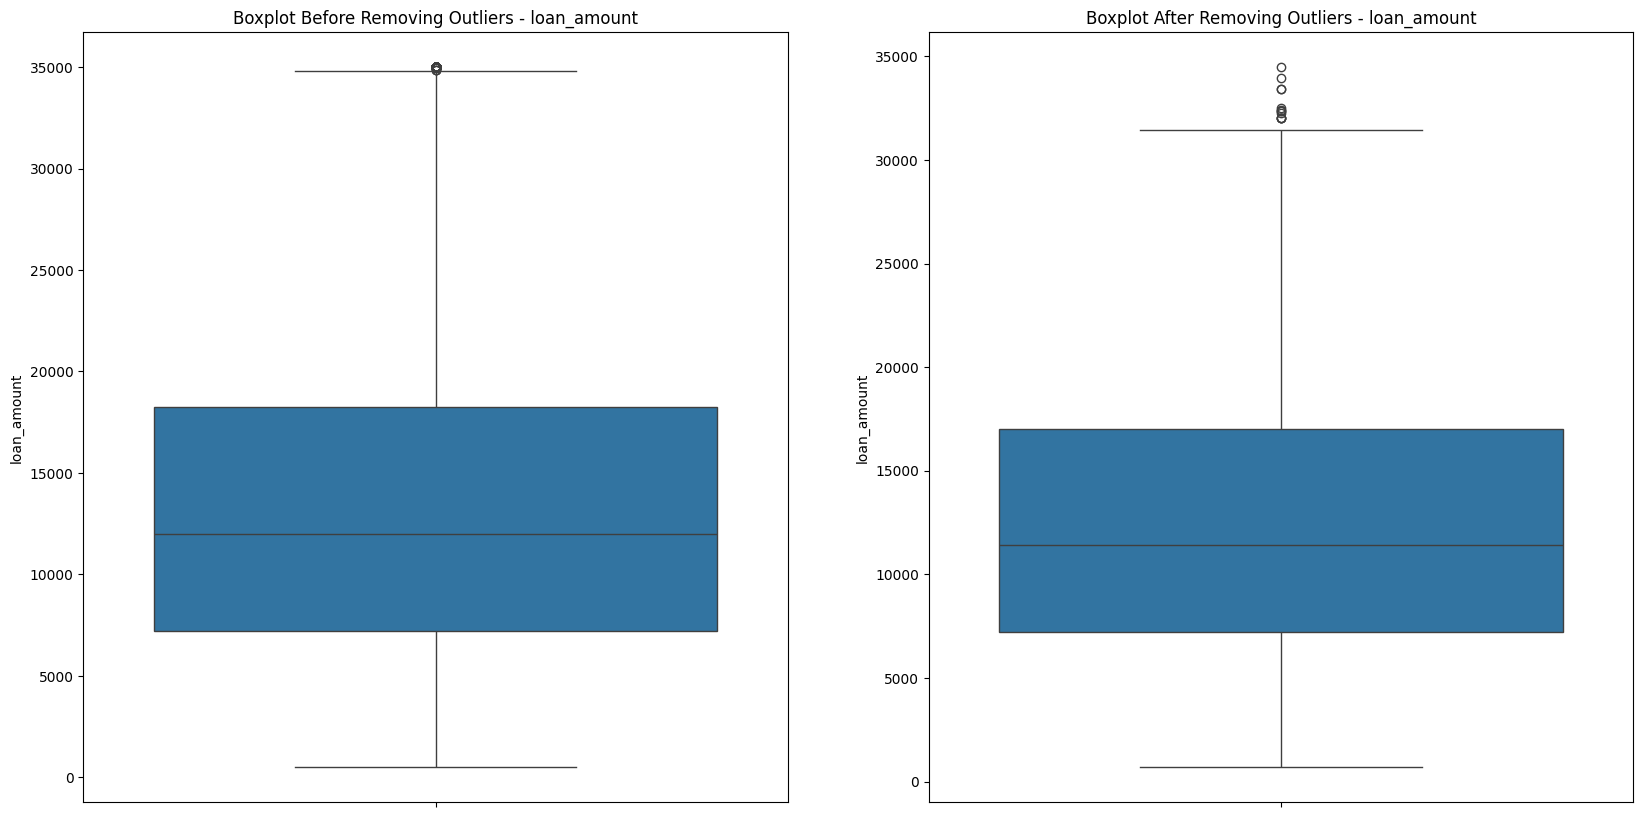

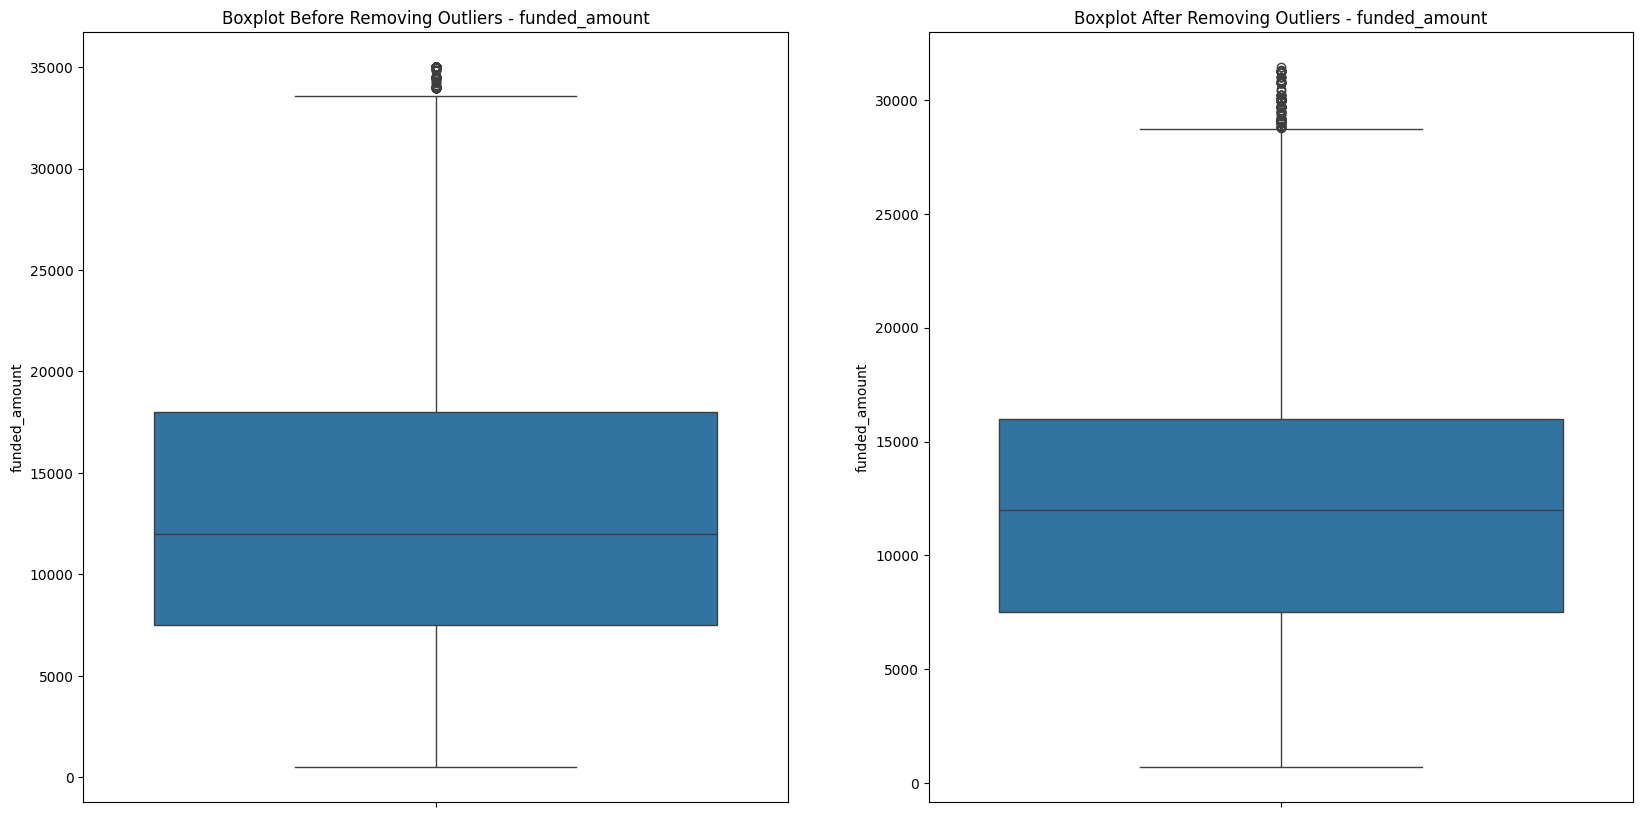

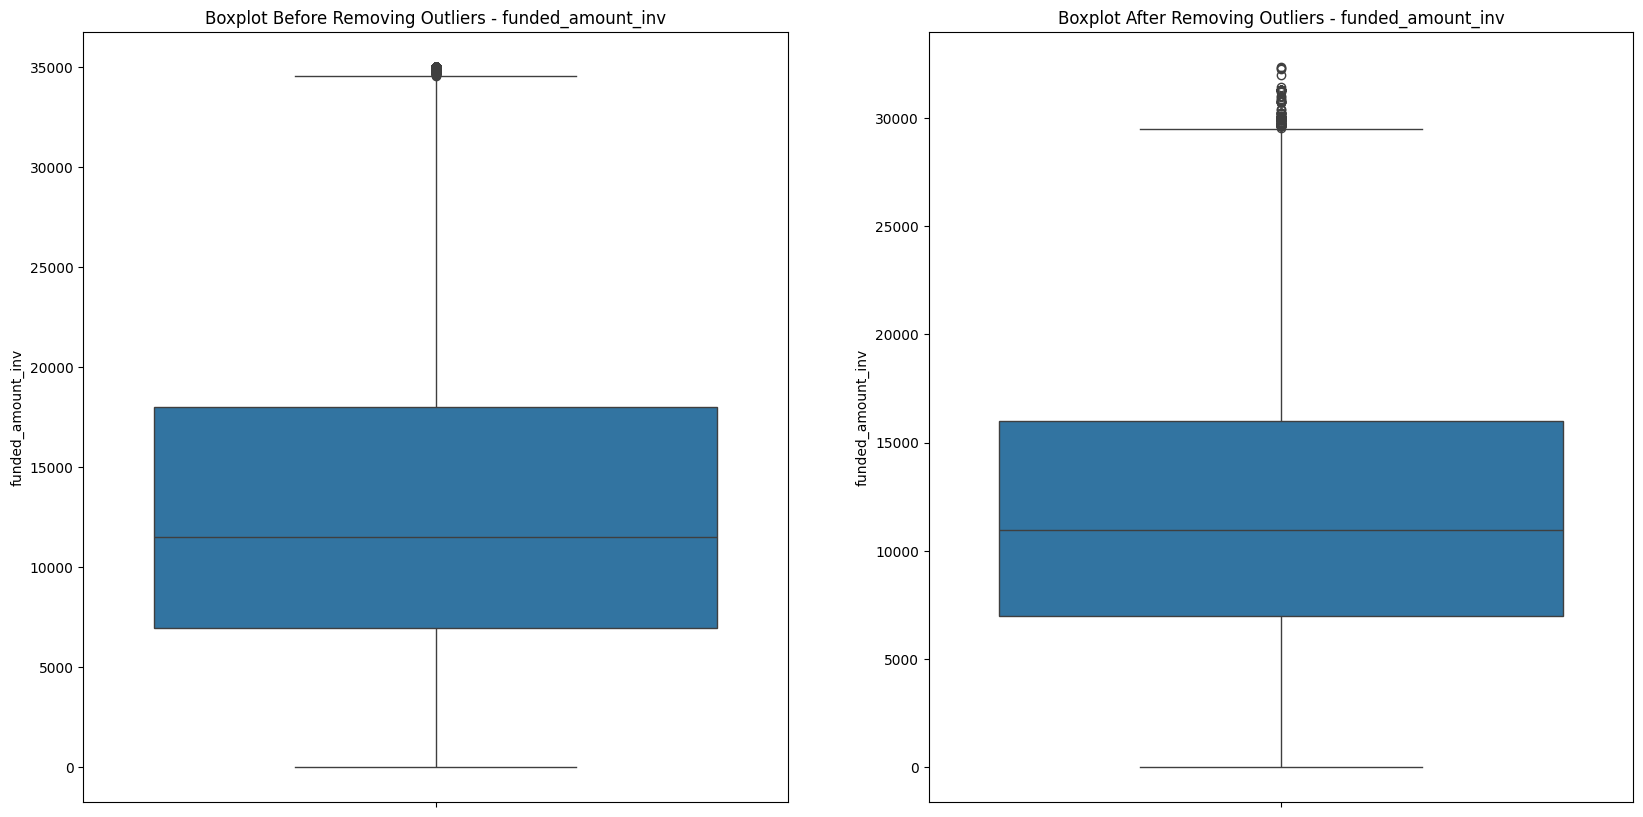

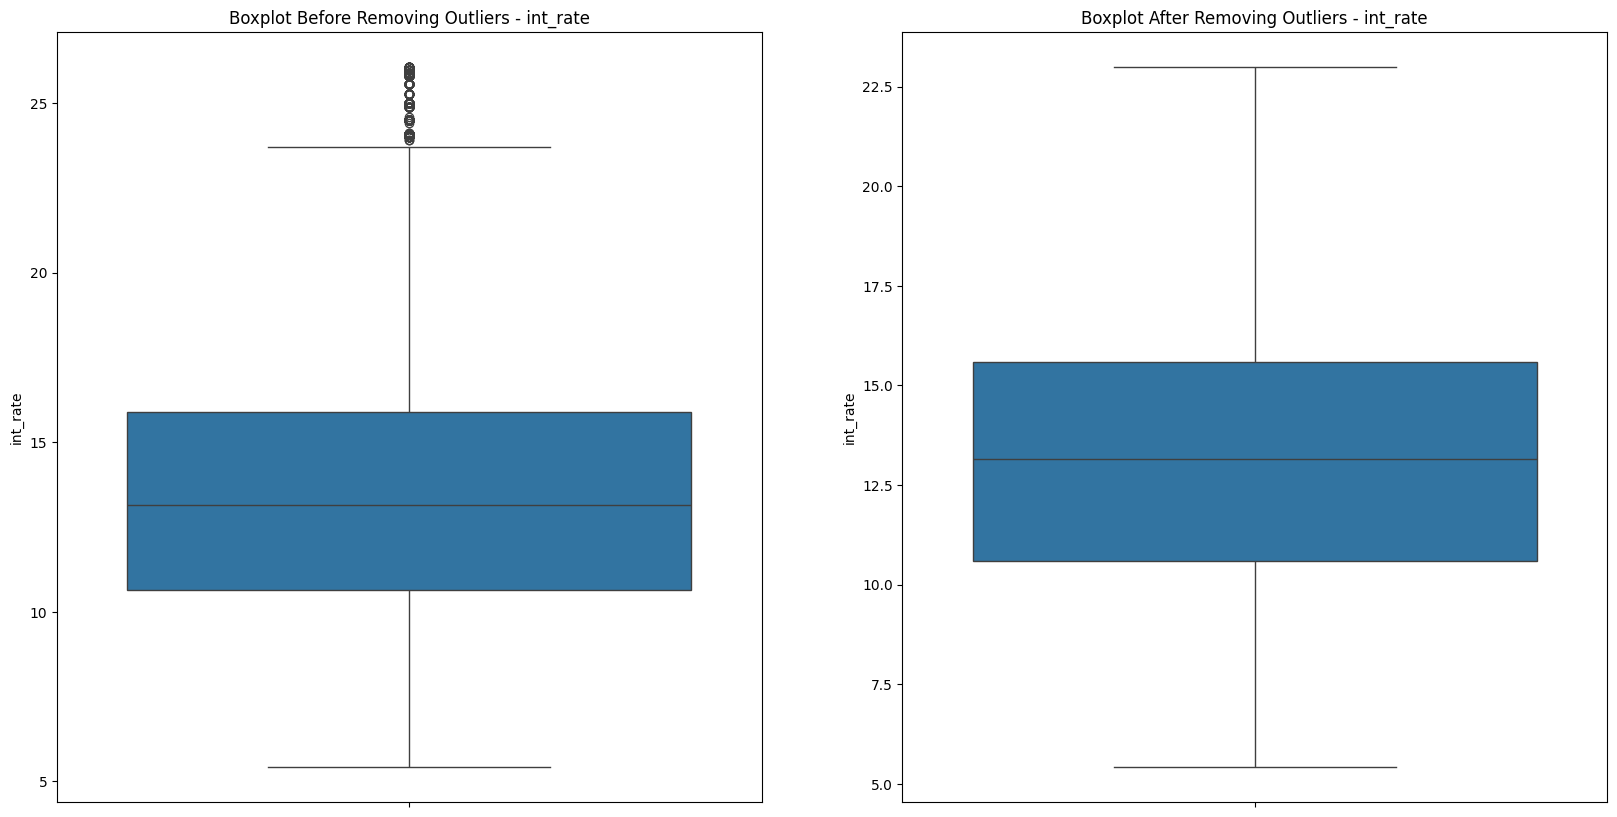

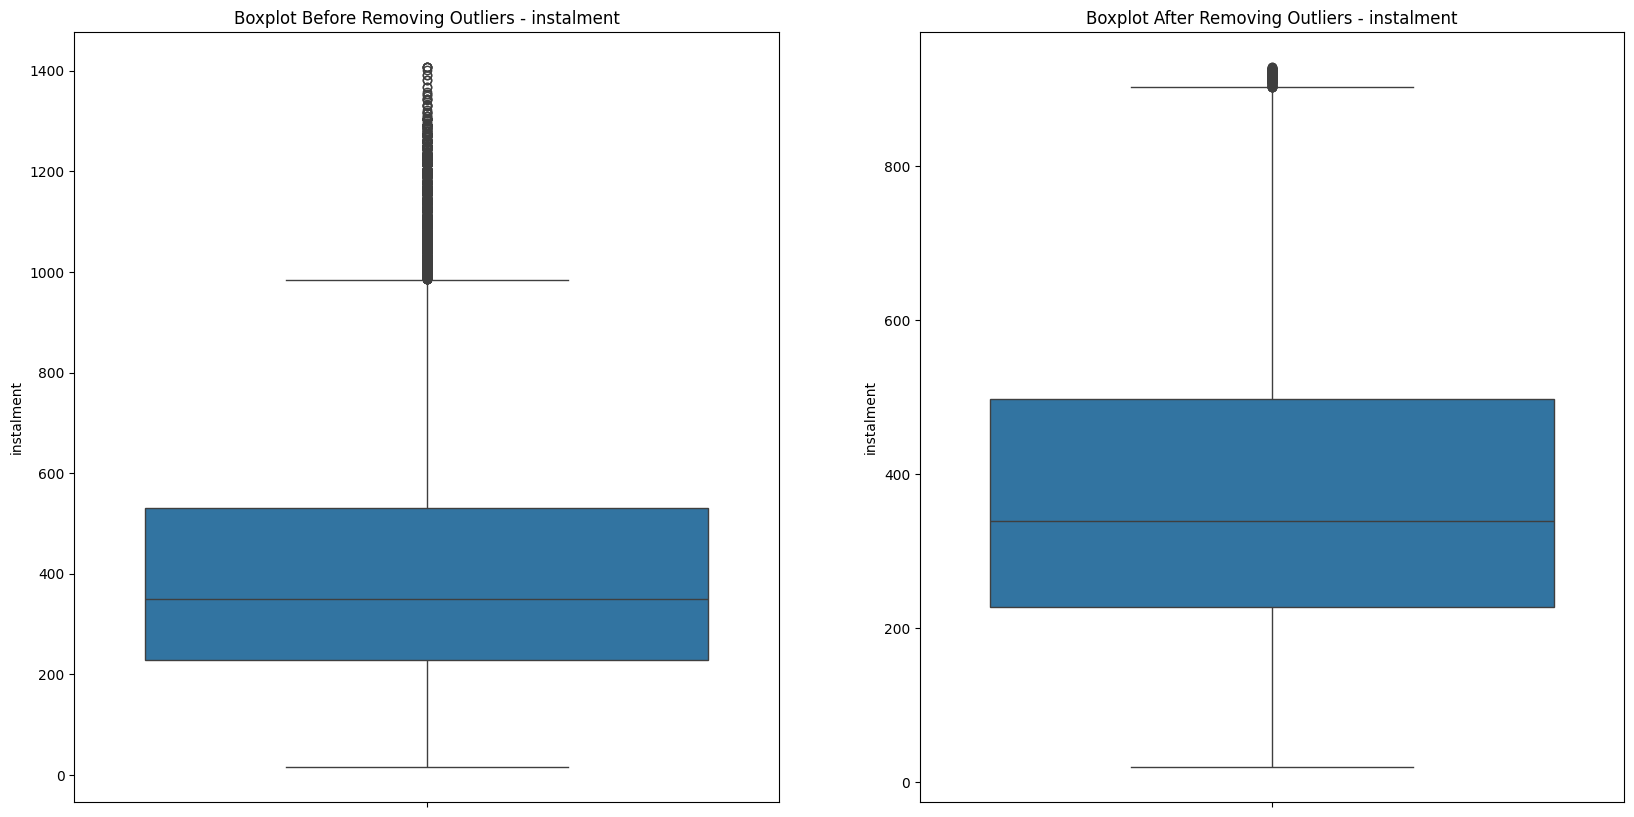

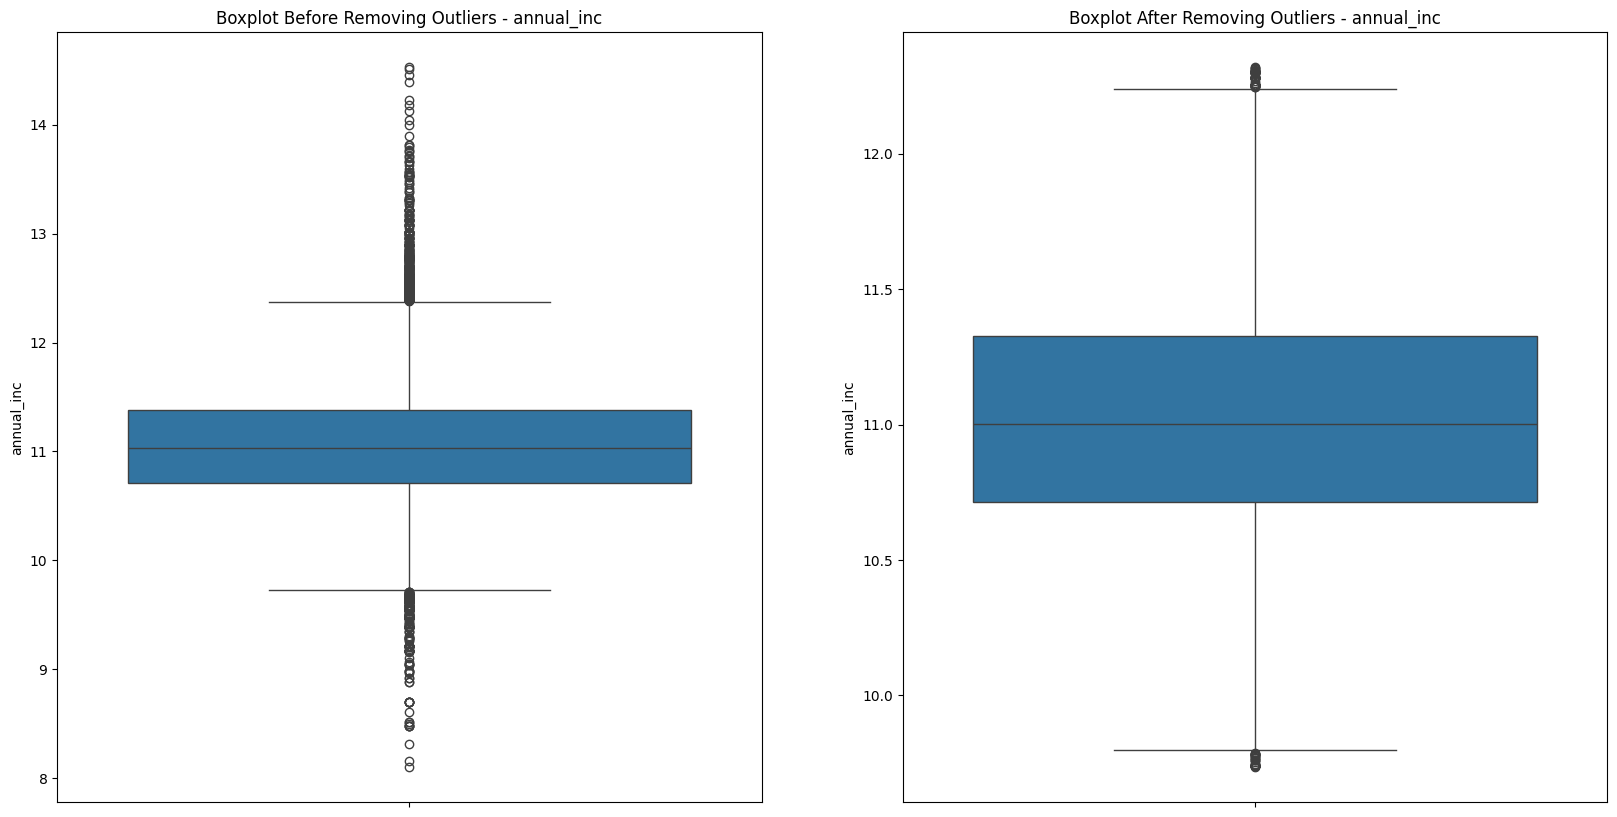

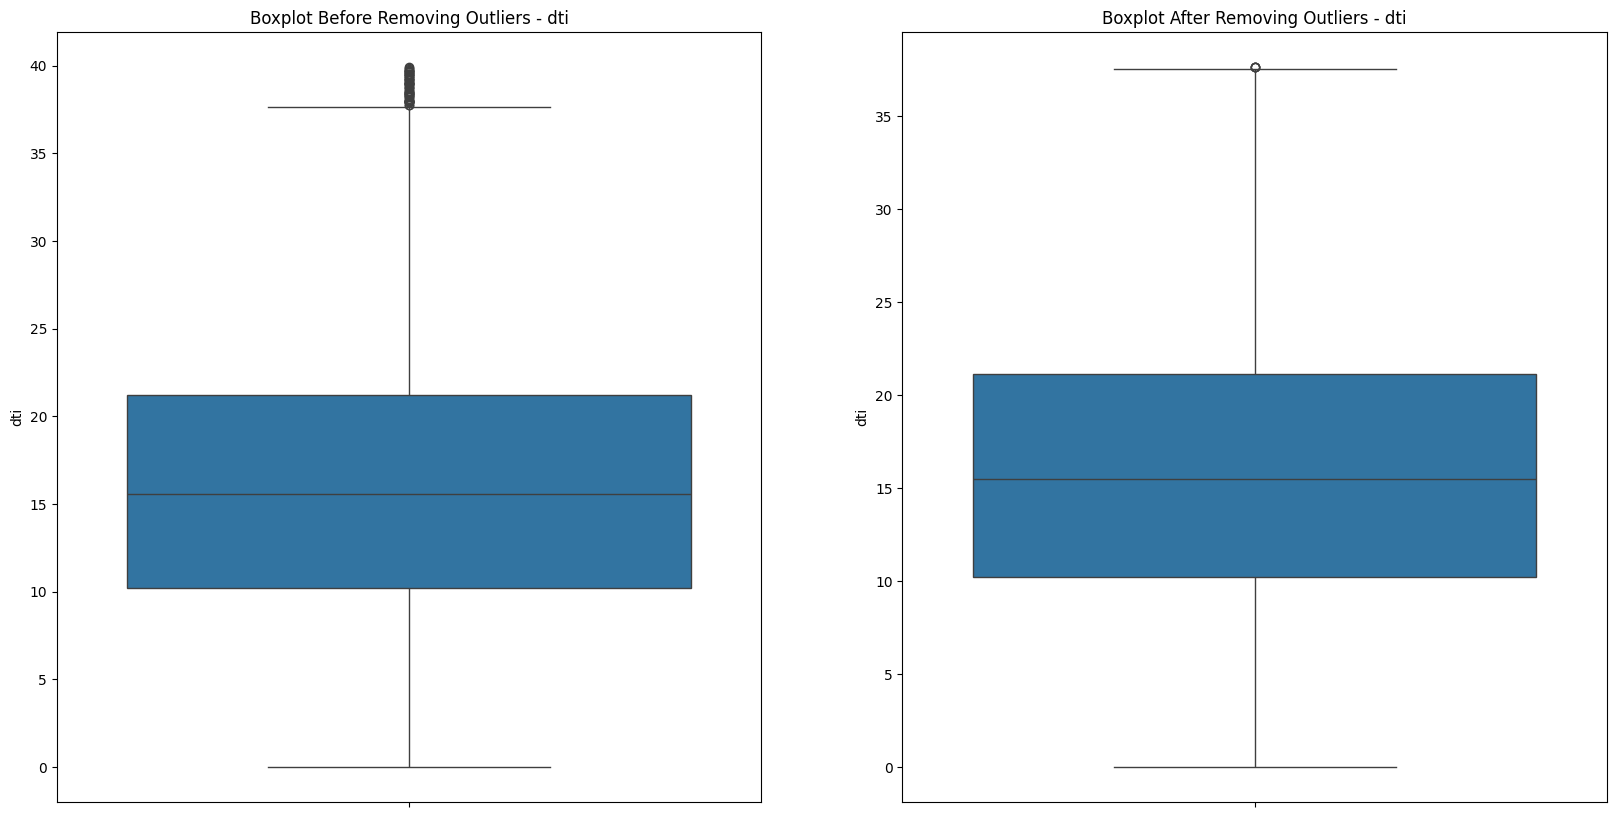

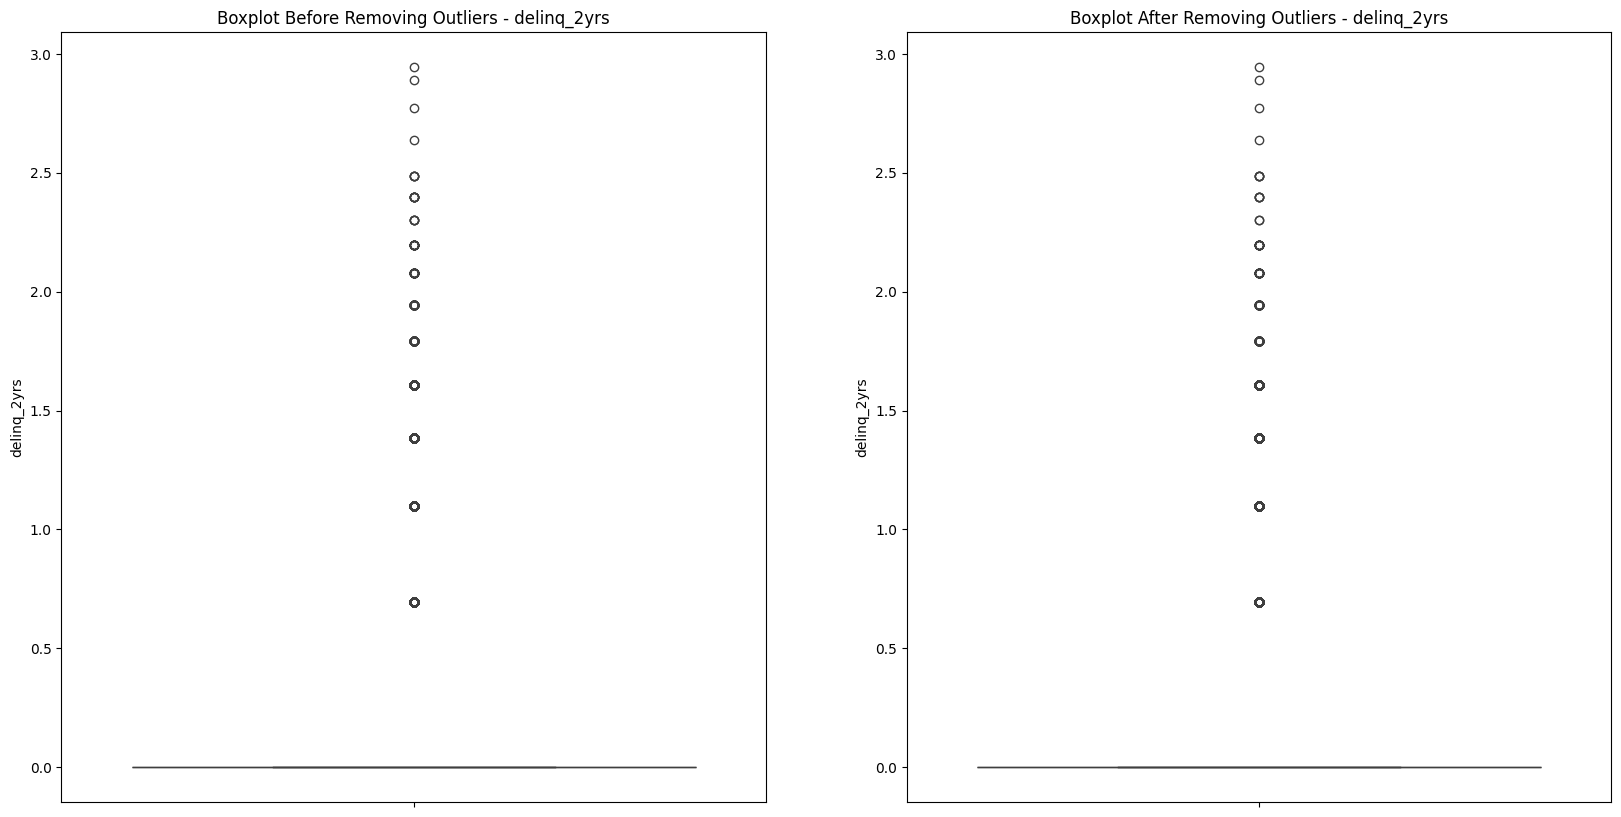

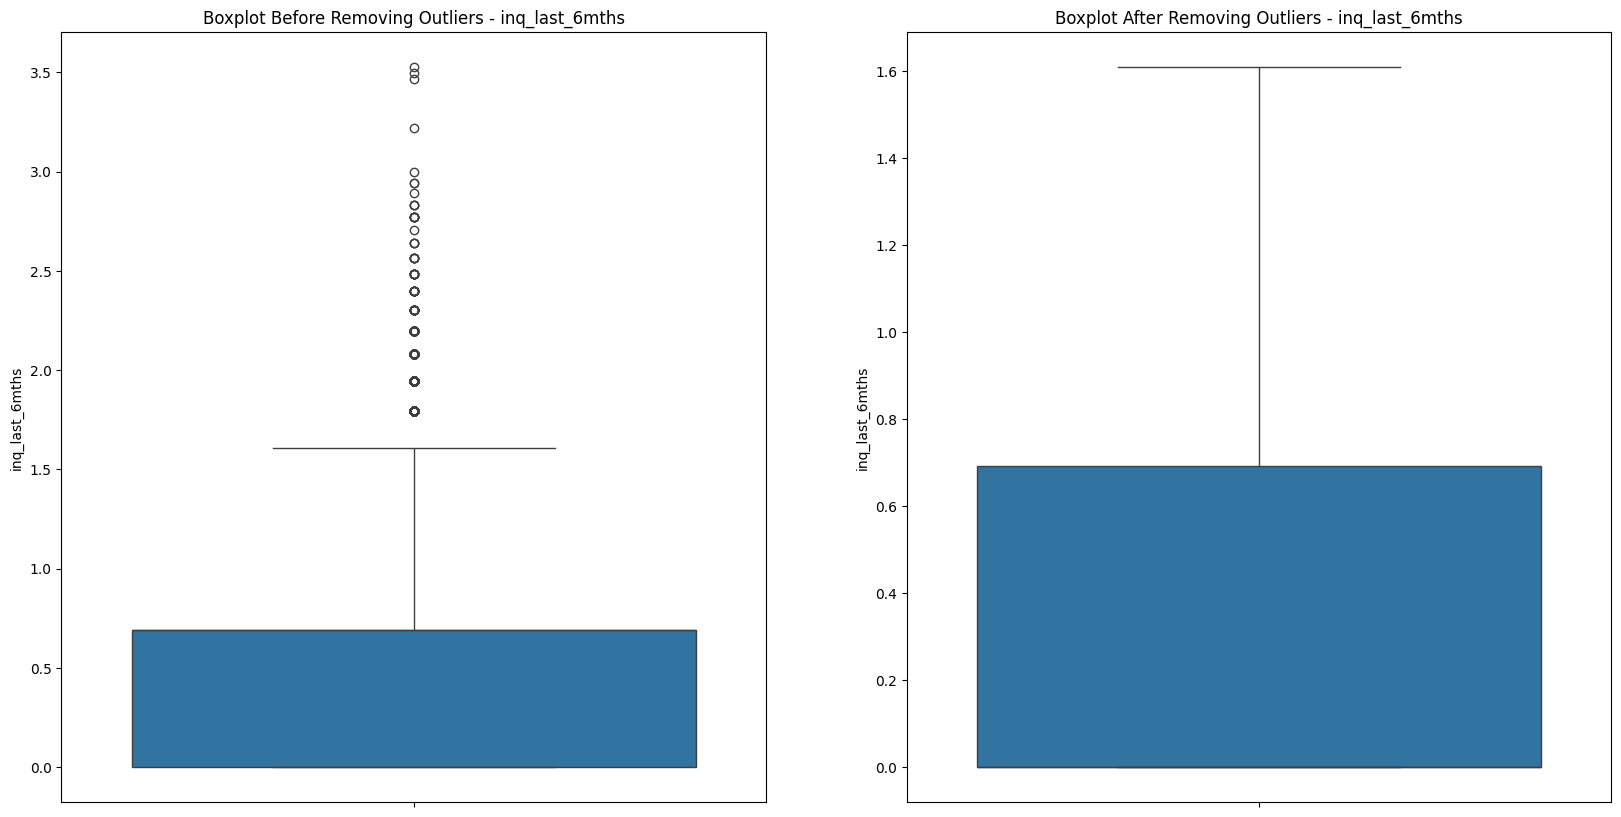

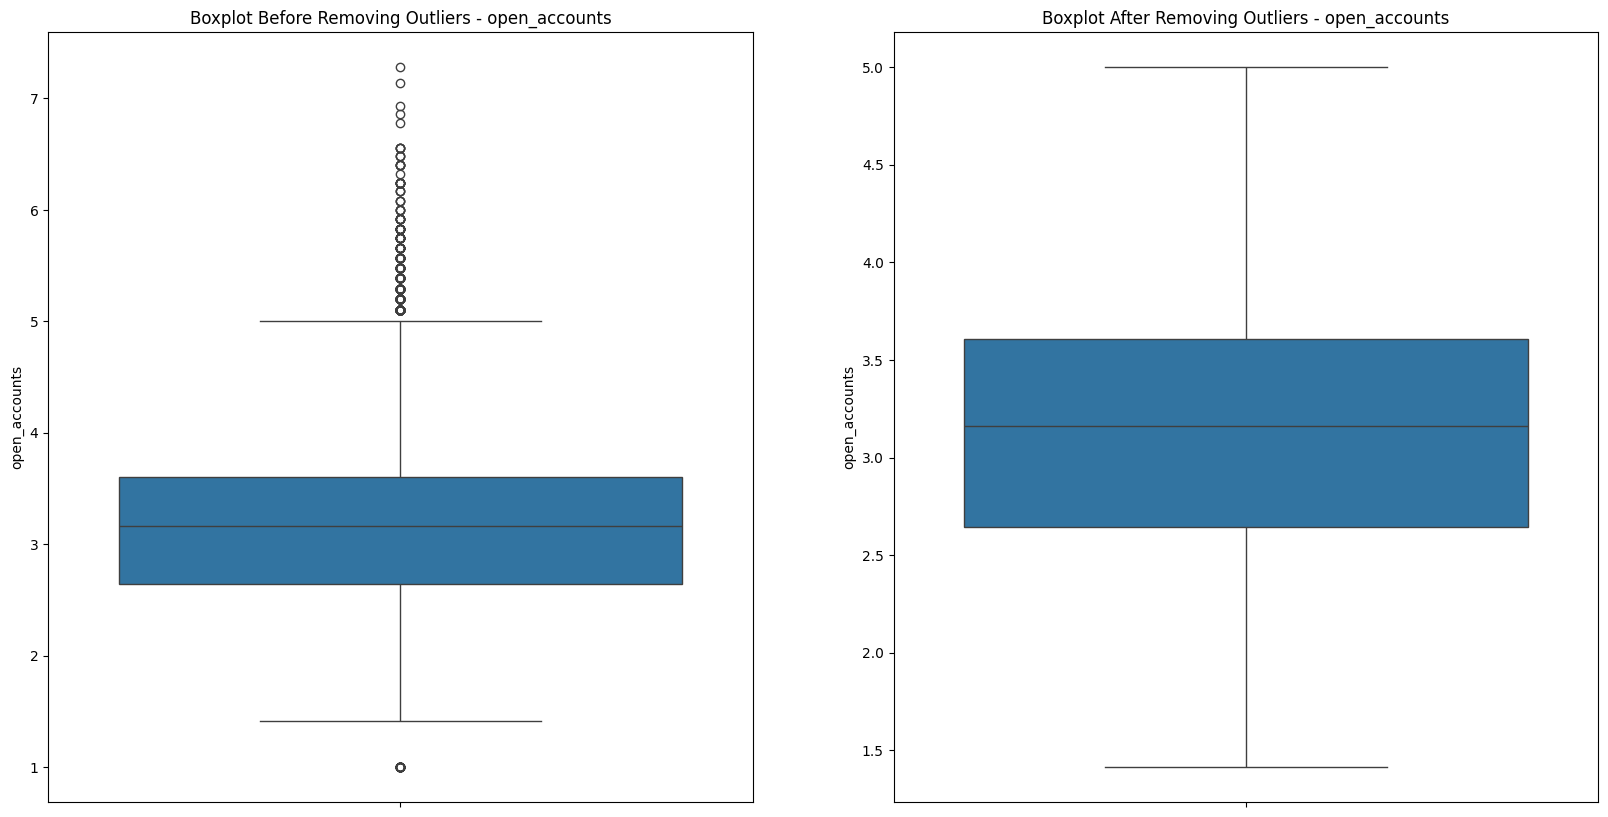

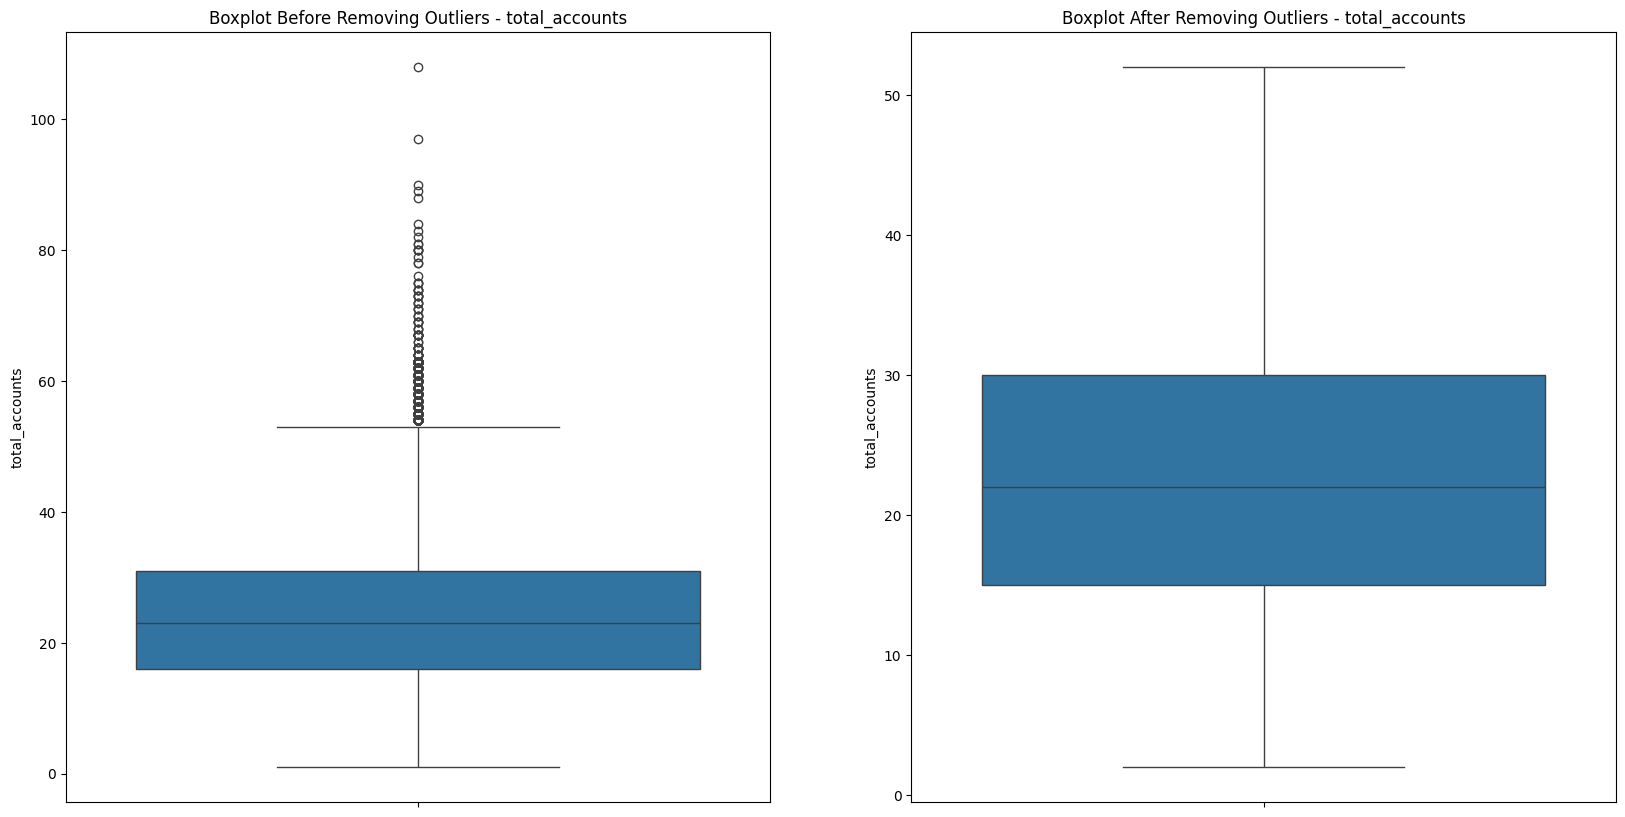

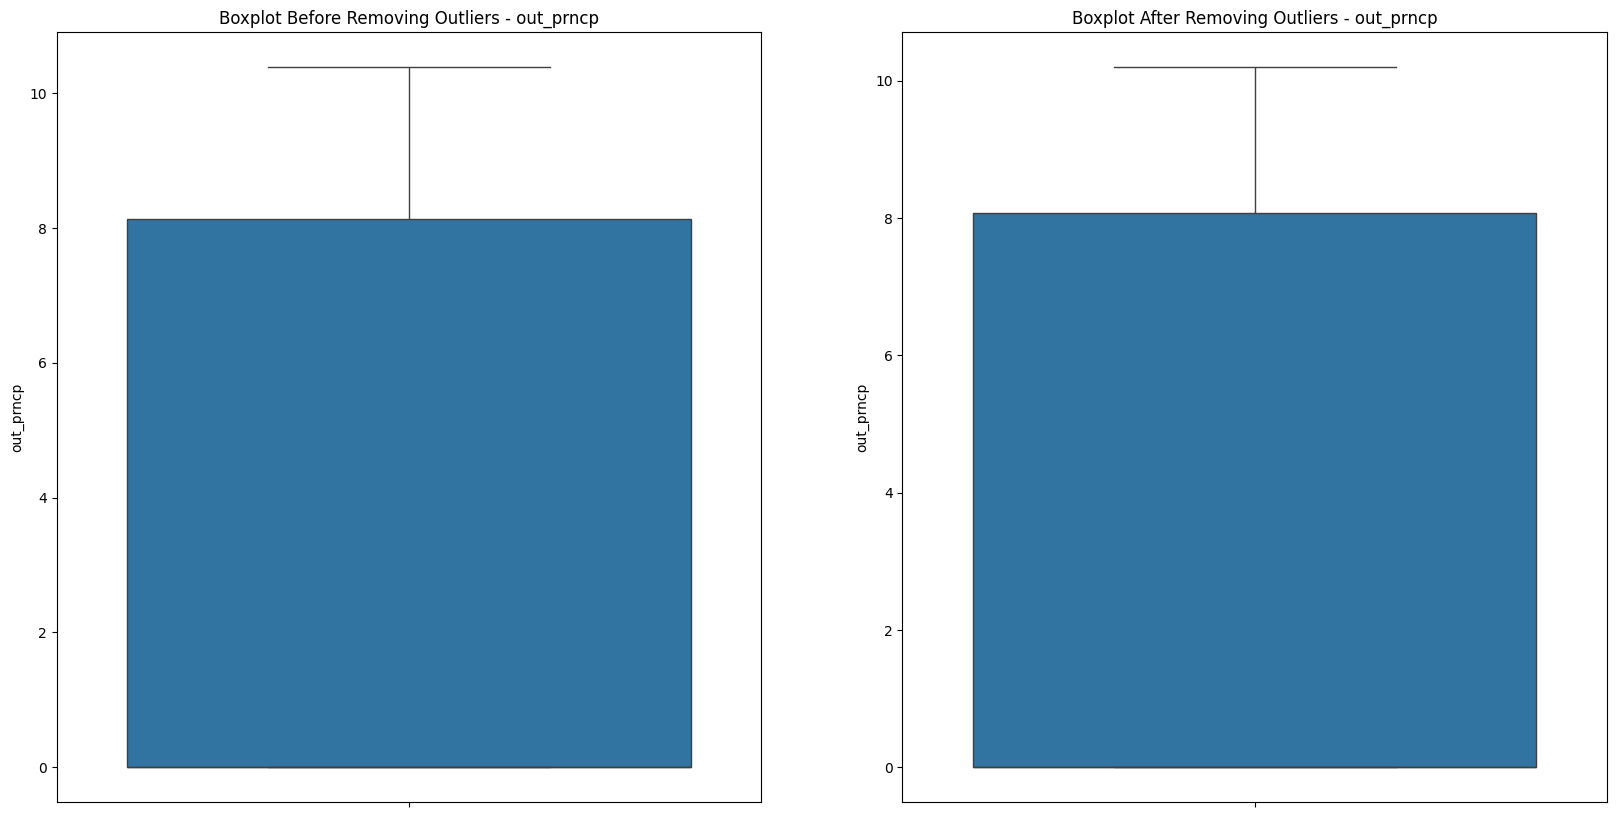

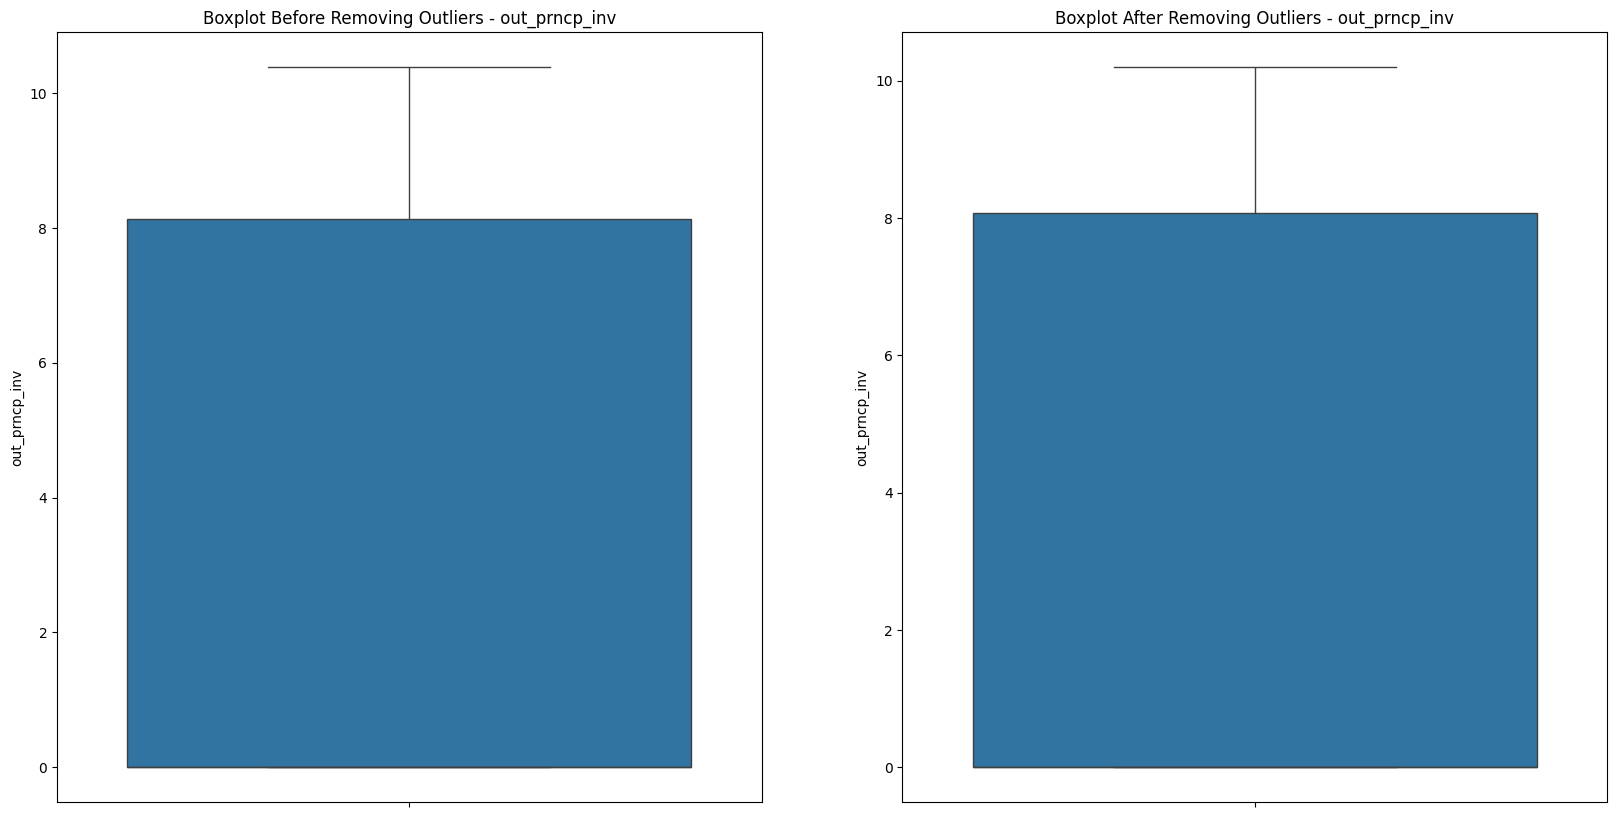

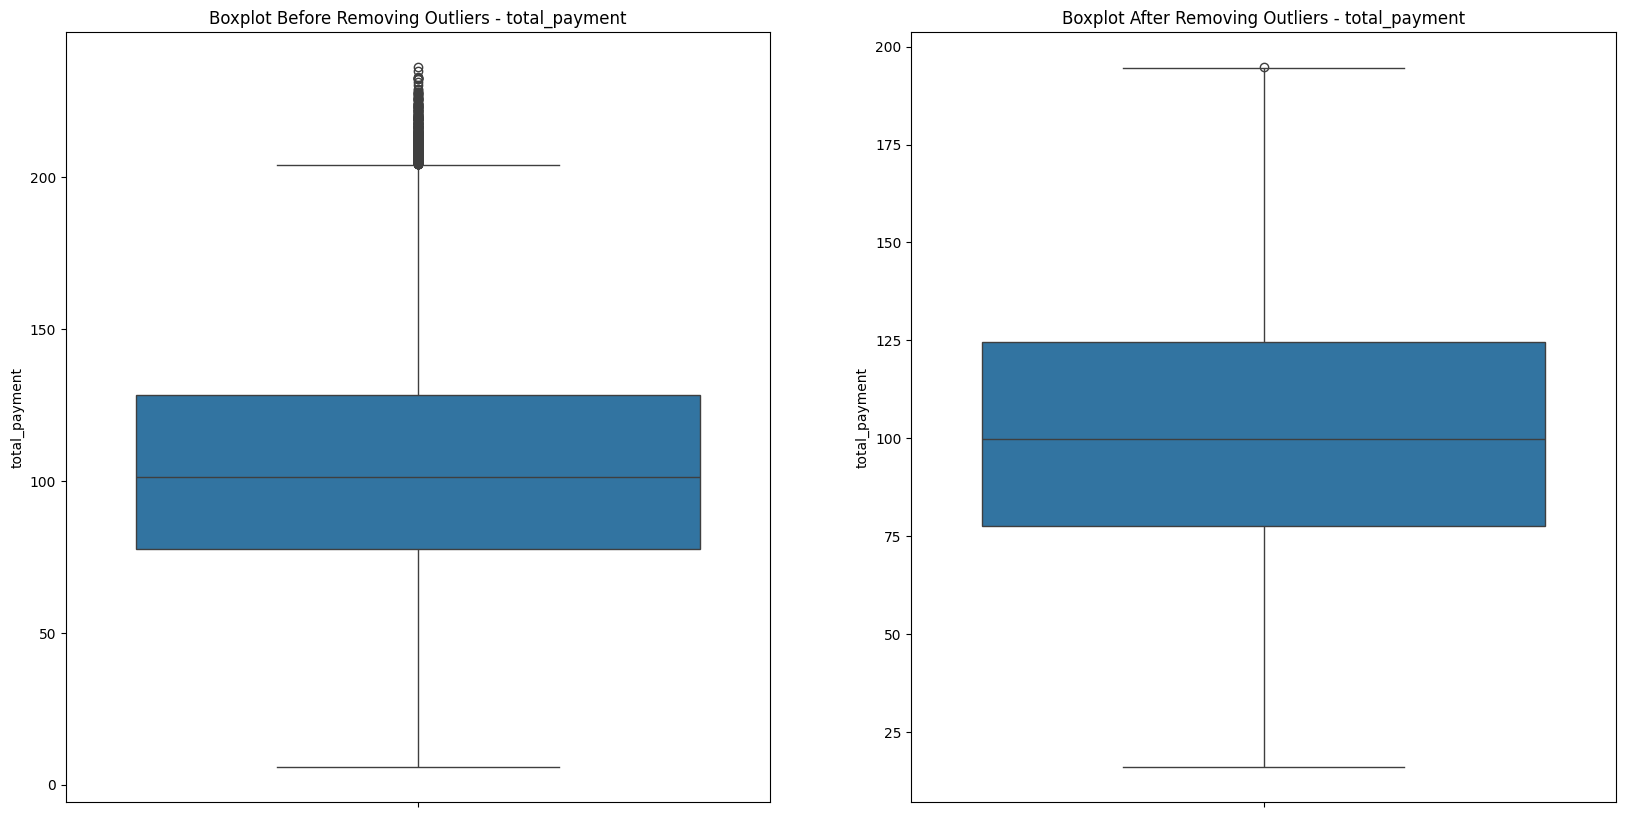

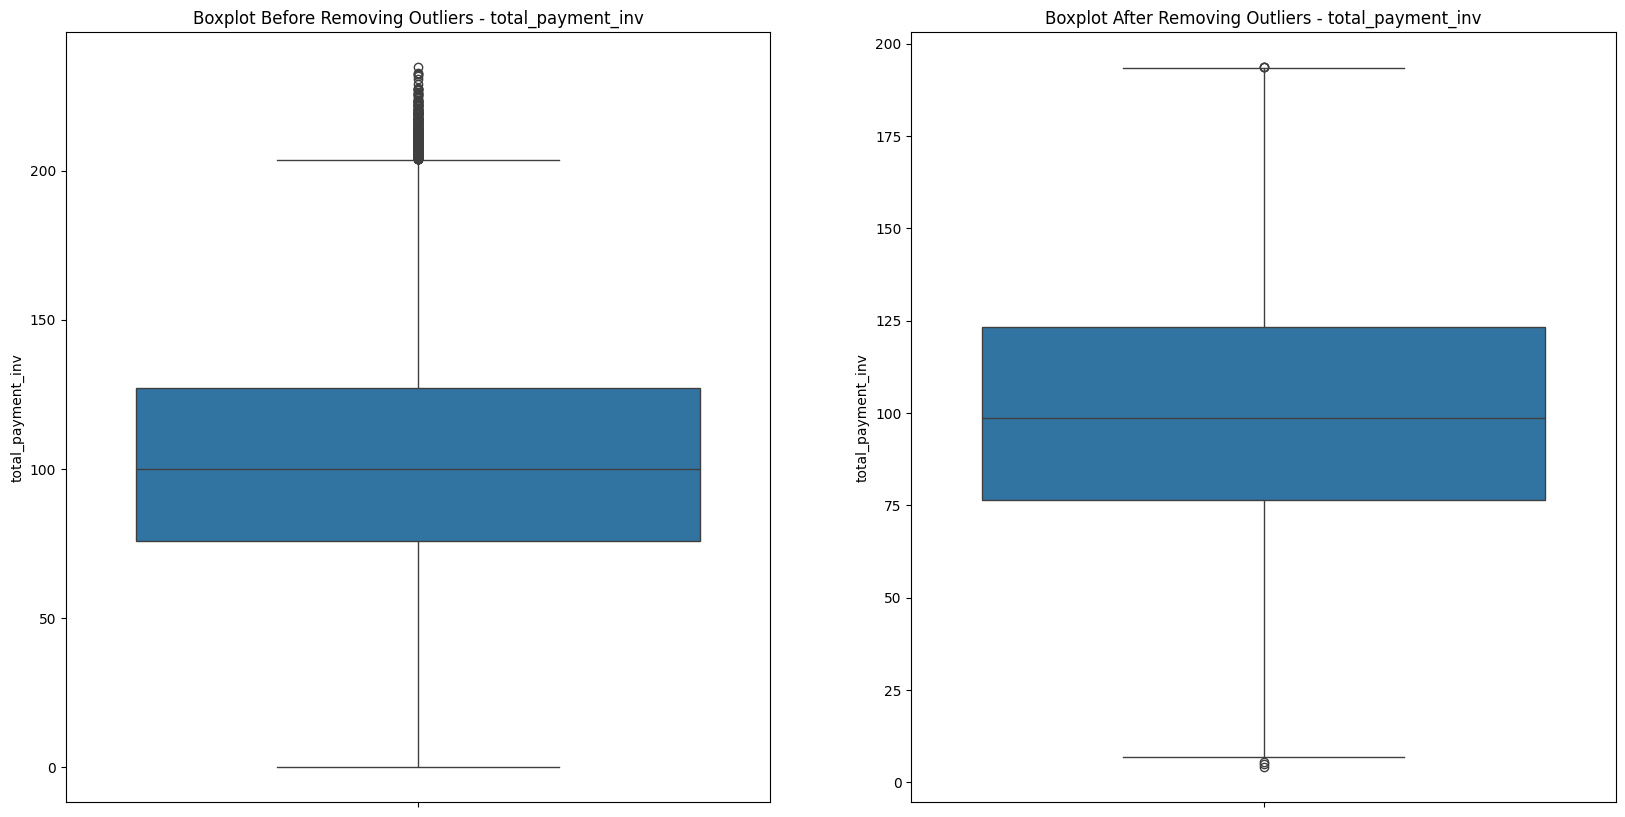

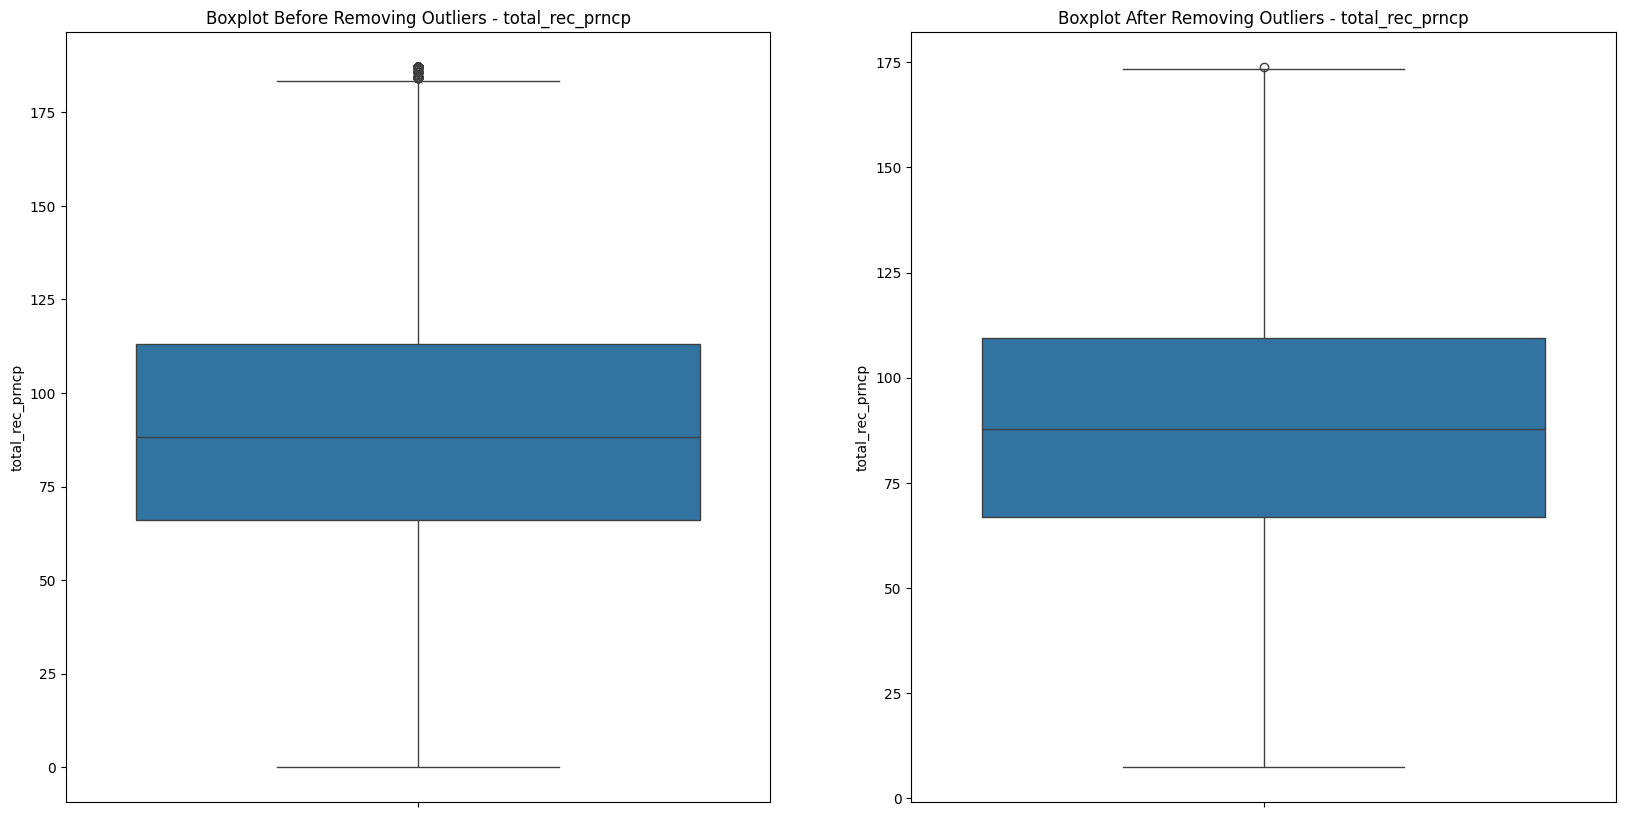

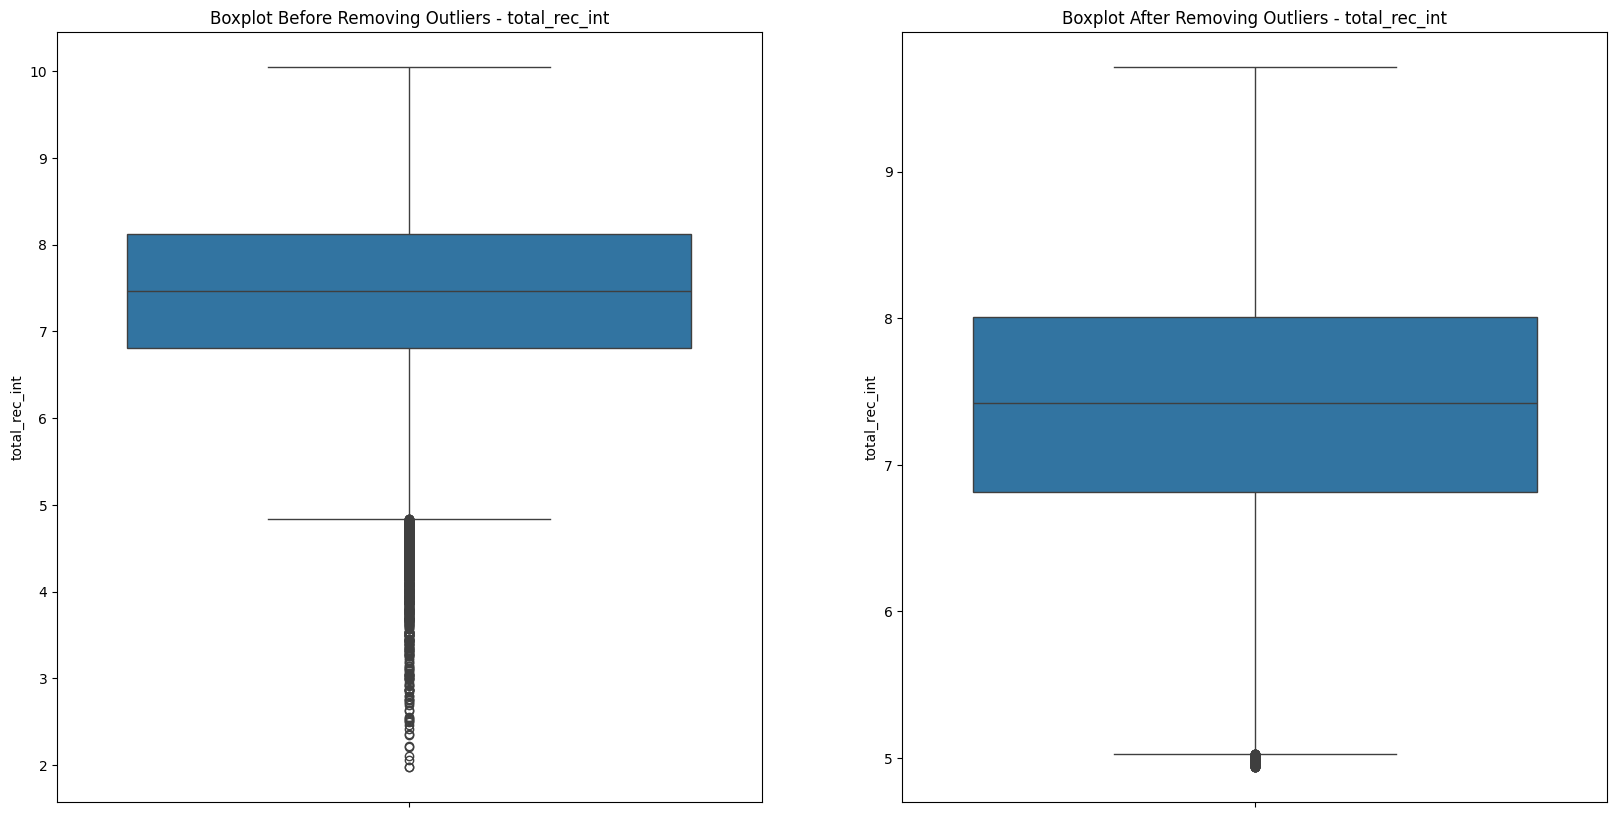

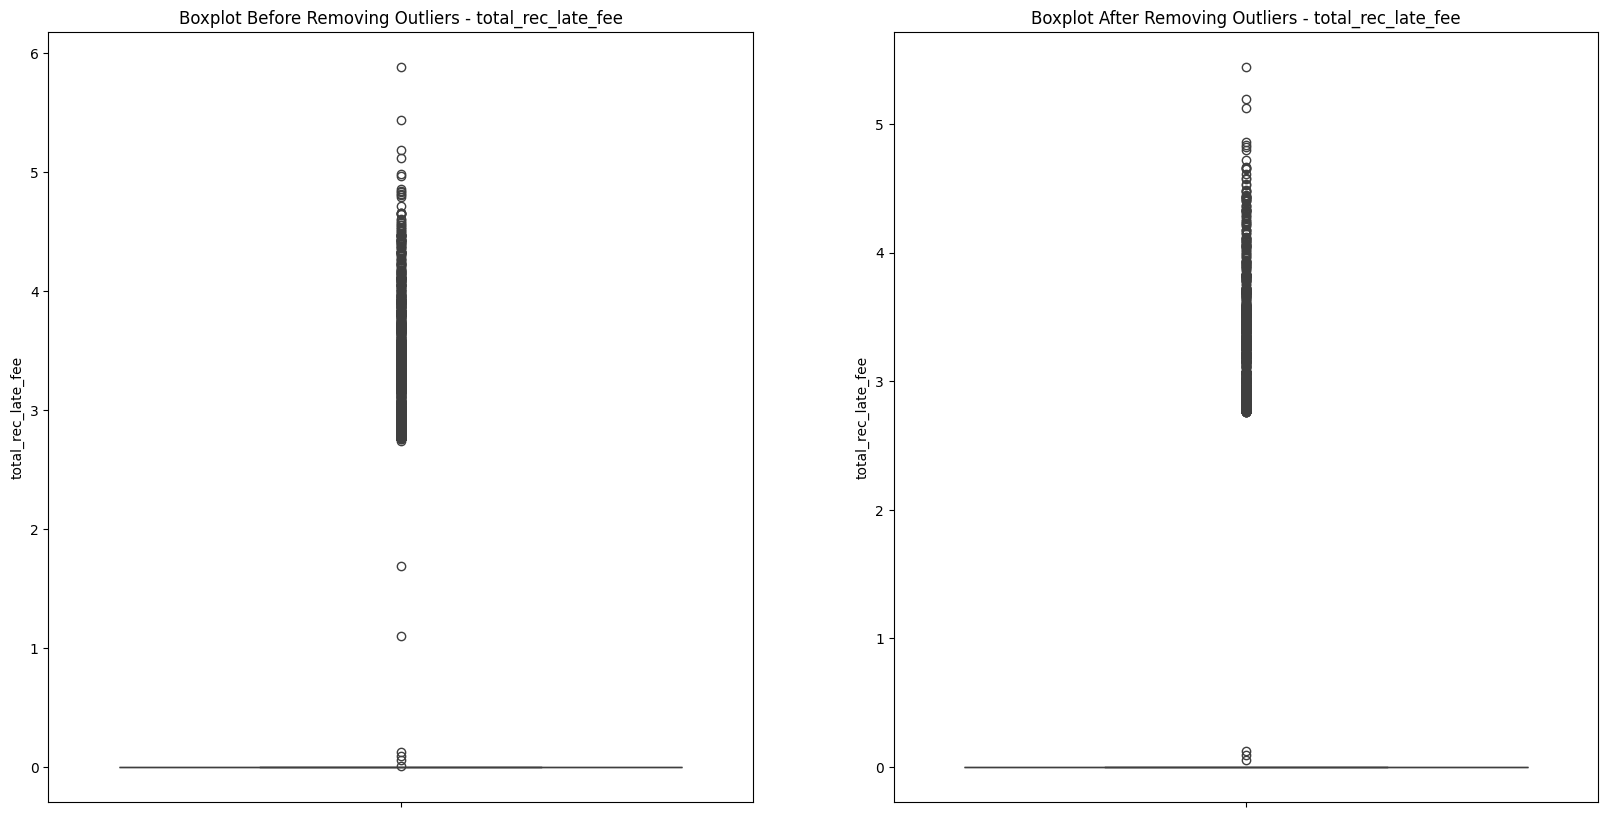

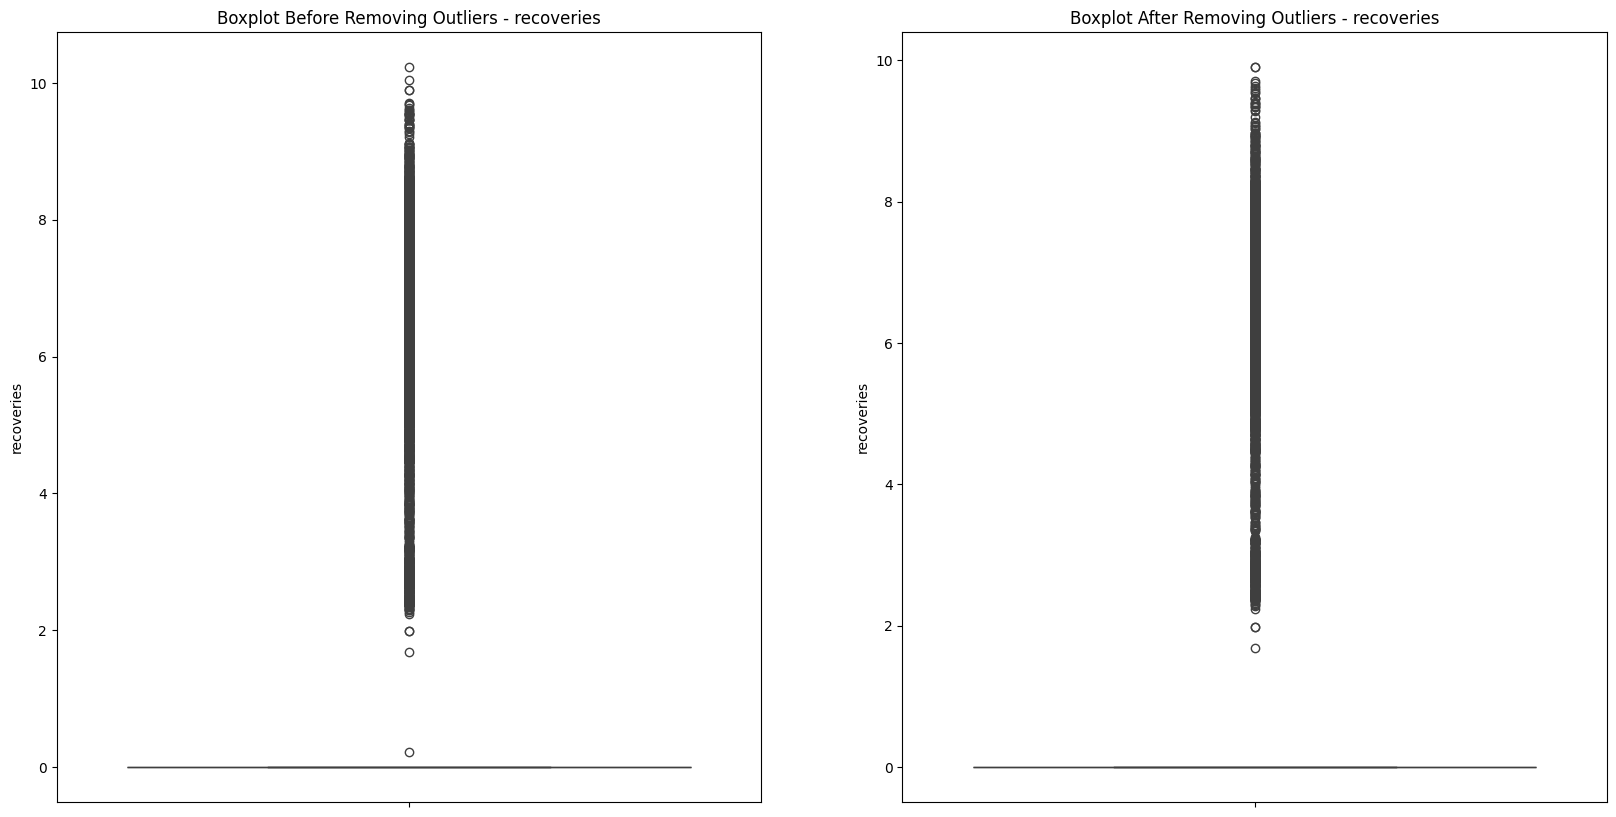

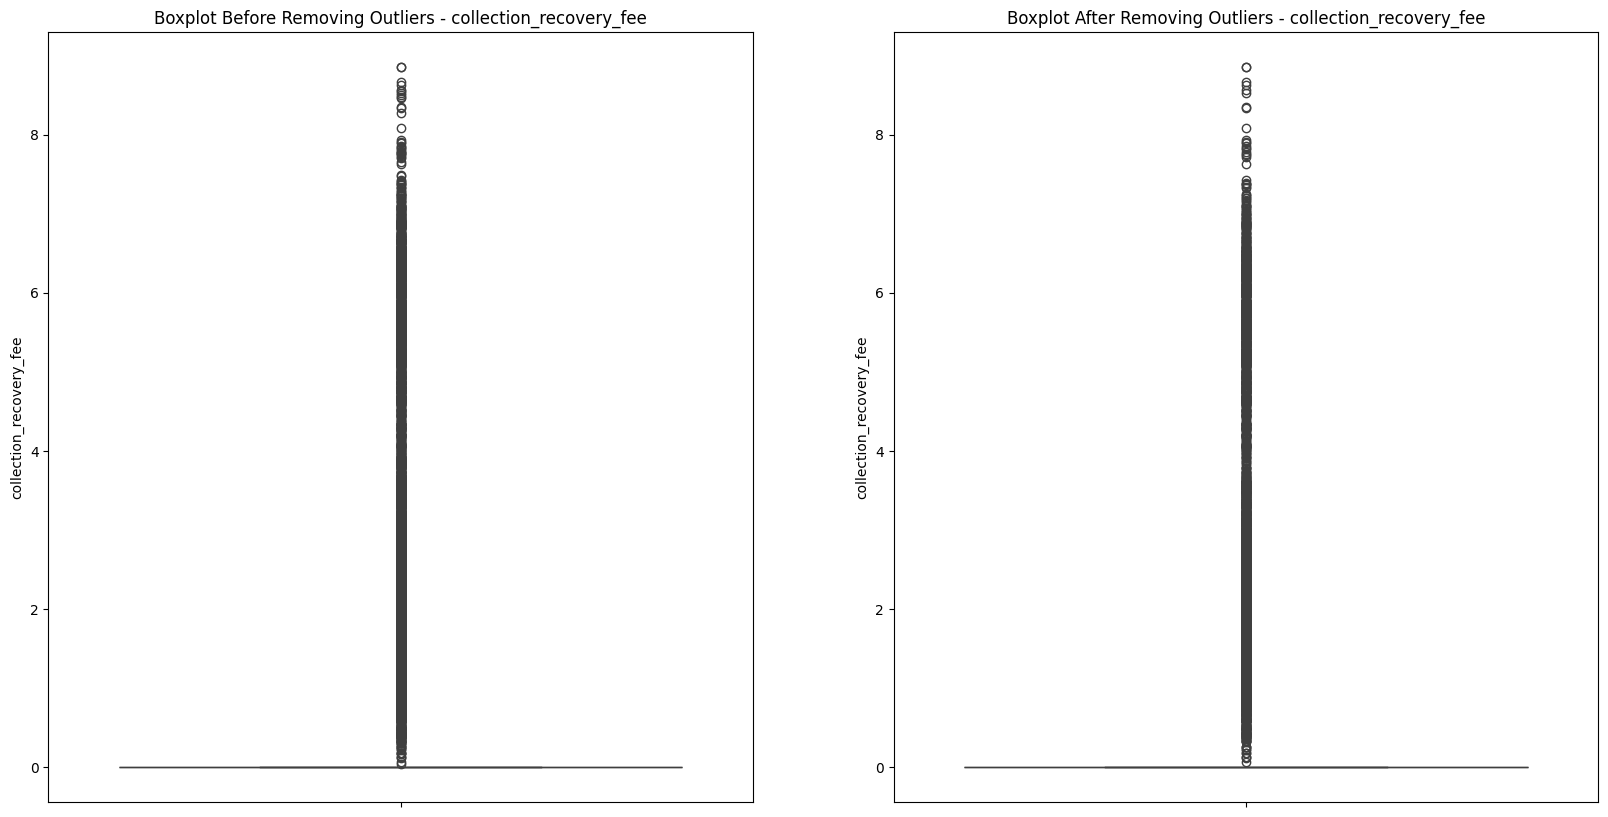

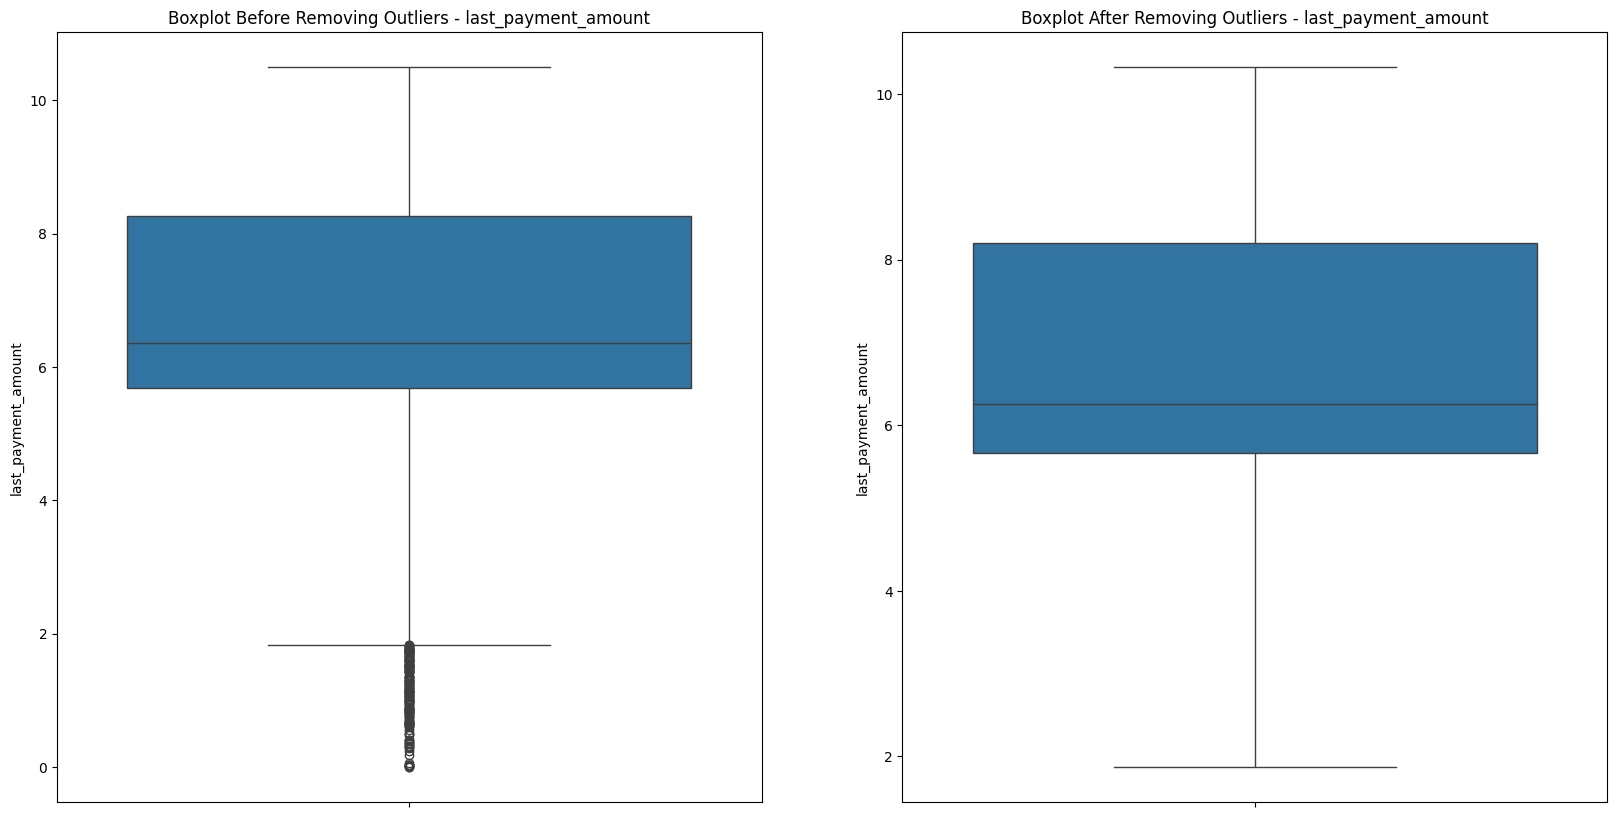

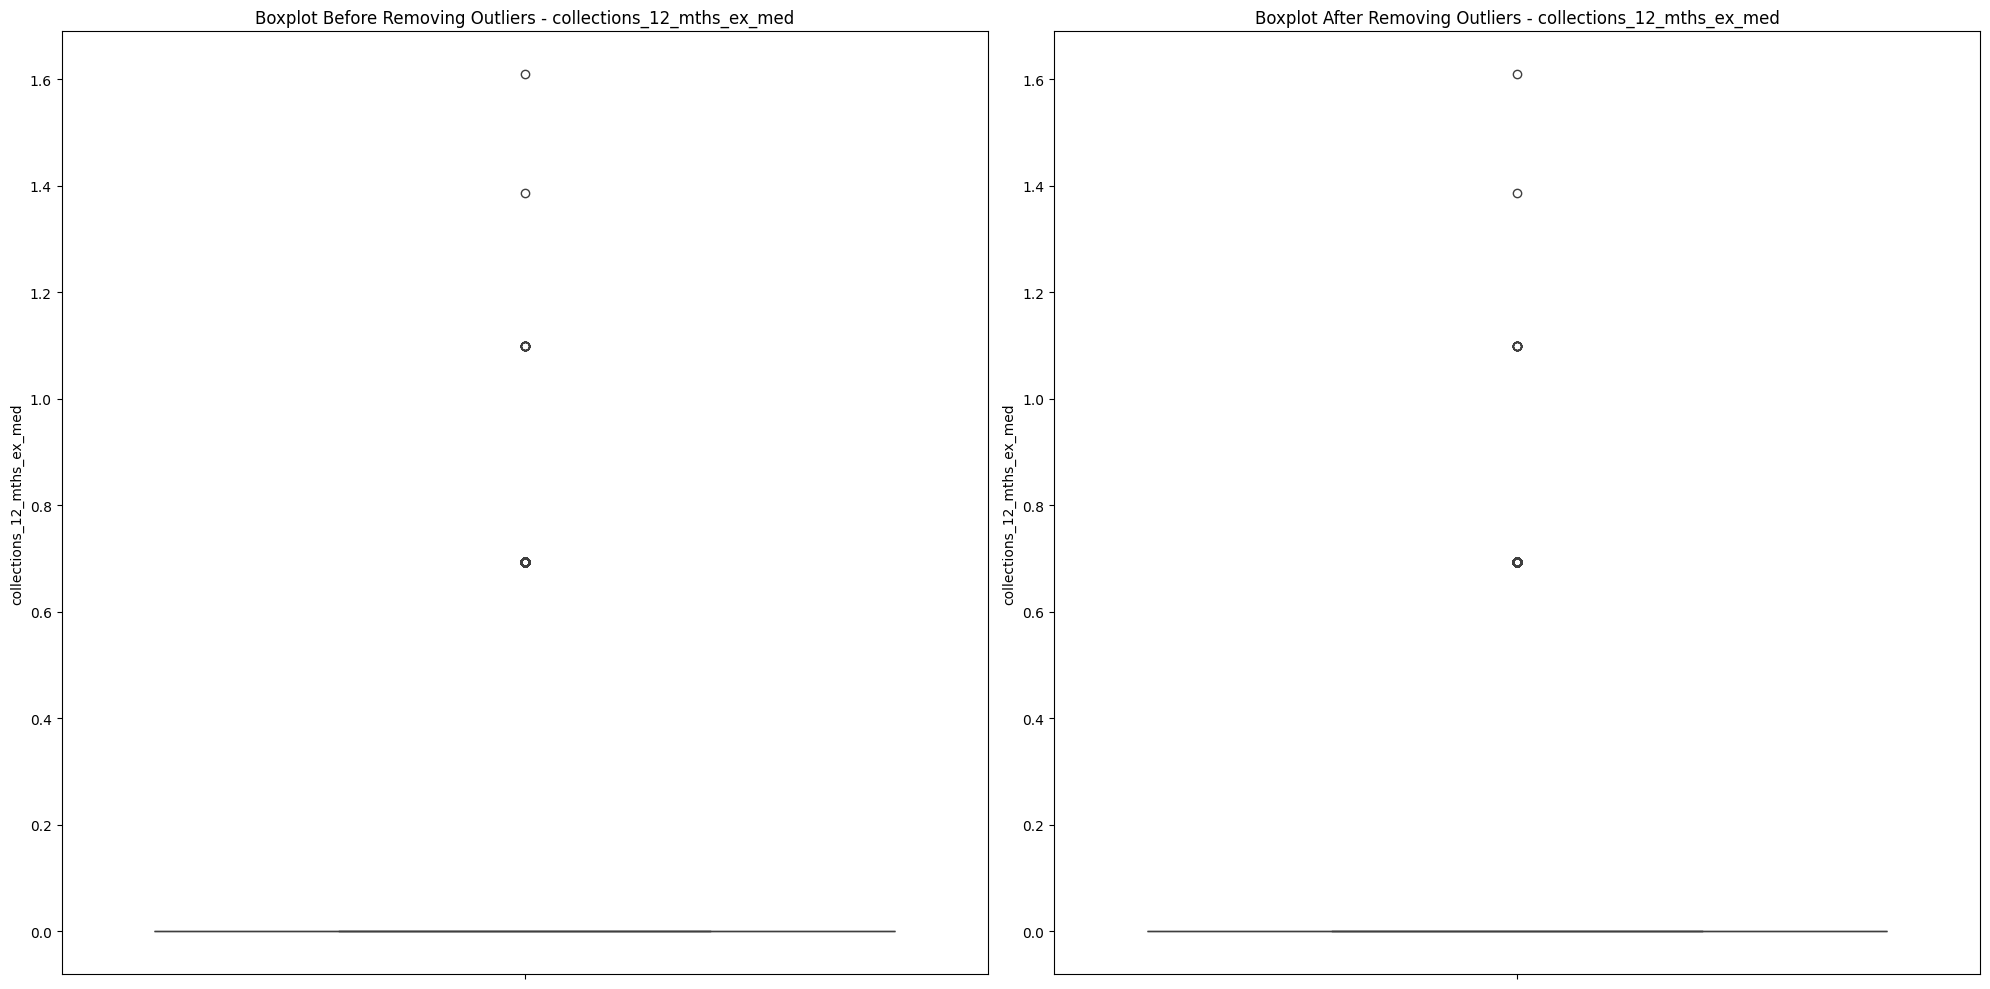

In [32]:
visualize.comparison_of_data(transformed_df,cleaned_df,numerical_columns)

# IGNORE THIS:

Below is just testing to see whether we need to remove outliers from the data:

From the above results we saw that the columns with outliers were - total_rec_late_fees, recoveries & collection_recovery_fee

So we could use these as a new variable: 

```python
columns_with_outliers = ['total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
```

In [34]:
#Looking at the information within the columns to see what kind of data we have:

#for col in columns_with_outliers:
   # zero_count = (transformed_df[col] == 0).sum()
    #non_zero_count = (transformed_df[col] != 0).sum()
   # print(f"{col}: {zero_count} zeros, {non_zero_count} non-zeros, {non_zero_count / len(transformed_df) * 100:.2f}% non-zero")

Visalising the data for these three columns with outliers:

In [35]:
import matplotlib.pyplot as plt

#for col in columns_with_outliers:
 #   plt.figure(figsize=(8, 4))
 #   df[col].hist(bins=50)
  #  plt.title(f"Distribution of {col}")
  #  plt.show()

In [36]:
#visualize.boxplot_columns(transformed_df,columns_with_outliers)

To remove the outliers we will use cutoffs for each but will test a few options to see which is best to help skewness but without losing too much data:

```python
cutoff_value = 6

cleaned_df = transformed_df[transformed_df['recoveries'] <= cutoff_value]
data_loss_percent = (1 - (len(cleaned_df)/len(transformed_df))) * 100

print(f"Original DataFrame shape: {transformed_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
print(f"Percentage of data removed: {data_loss_percent:.2f}%")



new_skew_values = cleaned_df[numerical_columns].apply(lambda x: skew(x.dropna()))
print(new_skew_values)
```
- For all three this was not helpful so have left all three as they were

Spoke to Vander and he told me to then look into the other outliers in the transformed_df

In [37]:
print(f"Original DataFrame shape: {transformed_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")

Original DataFrame shape: (51986, 39)
Cleaned DataFrame shape: (44139, 39)


In [38]:
#print(cleaned_df[['total_rec_late_fee', 'recoveries', 'collection_recovery_fee']].describe())

In [39]:
#for col in ['total_rec_late_fee', 'recoveries', 'collection_recovery_fee']:
#    print(f"Unique non-zero values in {col}:")
  #  print(len(transformed_df[transformed_df[col] > 0][col].unique()))
  #  print()

In [40]:
#cutoff_value = 6

#cleaned_df = transformed_df[transformed_df['collection_recovery_fee'] <= cutoff_value]
#data_loss_percent = (1 - (len(cleaned_df)/len(transformed_df))) * 100

#print(f"Original DataFrame shape: {transformed_df.shape}")
#print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
#print(f"Percentage of data removed: {data_loss_percent:.2f}%")


In [41]:
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 5))
#sns.boxplot(x=cleaned_df['collection_recovery_fee'])
#plt.axvline(x=cutoff_value, color='r', linestyle='--', label=f'Cut-off: {cutoff_value}')
#plt.legend()
#plt.title('Box Plot with Cut-off for collection_recovery_fee')
#plt.show()

In [42]:
#new_skew_values = cleaned_df[numerical_columns].apply(lambda x: skew(x.dropna()))
#print(new_skew_values)

#### 4. 

#### Null Data: 